# ACT460 Final Project: Implementation Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
def GBM_N(N,n,t, S_0, mu, sig,rs=42):
  """
  GBM simulation

  Parameters
  ----------
  N : int
      Number of simulations
  n : int
      Number of time steps
  t : float
      Time to maturity
  S_0 : float
      Initial stock price
  mu : float
      Drift
  sig : float
      Volatility
  rs : int
      Random seed
  Returns
  -------
  S : np.array (shape: Nxn)
      Simulated stock prices
      first entry is S(t_1) not S(t_0) = S_0
  """
  np.random.seed(rs)
  dt = t/n
  Z = np.random.randn(N,n)
  increment = (mu-(sig**2)/2)*dt+sig*np.sqrt(dt)*Z
  S = S_0*np.exp(np.cumsum(increment,axis=1))
  return S

def mc_arithmetic_assian_opt(S_0,k,r,sig,N,n,t,rs=42,plot=True, conf=0.95,trapezoid=False):
  """
  Monte Carlo simulation of an Asian option

  Parameters
  ----------
  S_0 : float
      Initial stock price
  k : float
  r : float
      Interest rate
  sig : float
      Volatility
  N : int
      Number of simulations
  n : int
      Number of time steps
  t : float
      Time to maturity
  plot : bool
      Whether to plot the histogram
  conf : float
      Confidence level
  trapezoid : bool
      Whether to use the trapezoidal correction

  Returns
  -------
  mean_price : float
      Estimated option price
  conf_int : tuple
      Confidence interval
      (lower bound, upper bound)
  """
  S = GBM_N(N,n,t, S_0, r, sig,rs=rs)
  A = S.mean(axis=1) # option mean
  if trapezoid == True:
    # trapezoidal correction
    A += (1/(2*n))*(S_0-S[:,-1])
  prices = np.exp(-r*t)*np.maximum(A-k,0) # pay-off
  mean_price = prices.mean() # MC estimate
  std_price = prices.std() # MC standard deviation
  conf_int = stats.norm.interval(confidence=conf,loc=mean_price,scale=std_price / np.sqrt(N))
  if plot == True:
    print("MC estimated option price: {}\nConficence interval: {}".format(mean_price,conf_int))
    p = int(N/100*12) # height of std and mean bar
    sns.histplot(prices, kde=True, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.plot([mean_price,mean_price],[0,p],color='red',label='Option Price {:.2f}'.format(mean_price))
    plt.plot([conf_int[0],conf_int[0]],[0,p],color='blue',label='Confidence Interval: ±{:.2f}'.format(mean_price-conf_int[0]))
    plt.plot([conf_int[1],conf_int[1]],[0,p],color='blue')
    plt.title("Histogram with KDE", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.show()
  return mean_price, conf_int

def mc_european_opt(S_0,k,r,sig,N,n,t,plot=True,rs=42,conf=0.95):
  """
  Monte Carlo simulation of an European option

  Parameters
  ----------
  S_0 : float
      Initial stock price
  k : float
  r : float
      Interest rate
  sig : float
      Volatility
  N : int
      Number of simulations
  n : int
      Number of time steps
  t : float
      Time to maturity
  plot : bool
      Whether to plot the histogram
  rs : int
      Random seed
  conf : float
      Confidence level

  Returns
  -------
  mean_price : float
      Estimated option price
  conf_int : tuple
      Confidence interval
  """
  S = GBM_N(N,n,t, S_0, r, sig,rs)
  prices = np.maximum(S[:,-1]-k,0)
  mean_price = np.exp(-r*t)*prices.mean()
  std_price = np.exp(-r*t)*prices.std()
  conf_int = stats.norm.interval(confidence=conf,loc=mean_price,scale=std_price / np.sqrt(N))
  if plot == True:
    p = int(N/100*12)
    print("MC estimated option price: {}\nConficence interval: {}".format(mean_price,conf_int))
    sns.histplot(prices, kde=True, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.plot([mean_price,mean_price],[0,p],color='red',label='Option Price {:.2f}'.format(mean_price))
    plt.plot([conf_int[0],conf_int[0]],[0,p],color='blue',label='Confidence Interval: ±{:.2f}'.format(mean_price-conf_int[0]))
    plt.plot([conf_int[1],conf_int[1]],[0,p],color='blue')
    plt.title("Histogram with KDE for European call", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.show()
  return mean_price, conf_int

## Question 1

Simulation results for the GBM and the underlying averaging

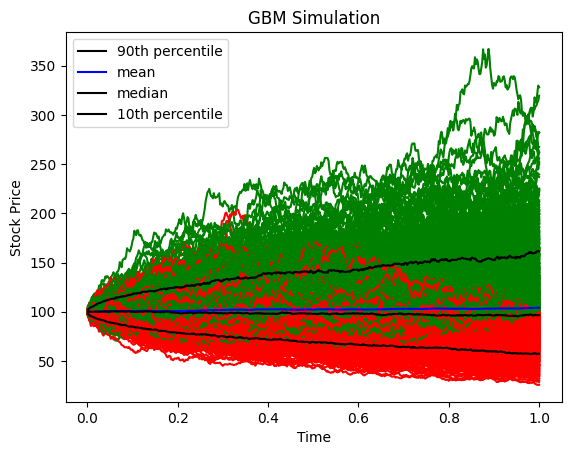

In [ ]:
N = 1000
n = 500
t = 1
S0 = 100
r = 0.05
sig = 0.4

S = GBM_N(N,n,t,S0,r,sig)
dt = t/n
k=100
time = [i*dt for i in range(1,n+1)]

for i in range(N):
  if S[i,-1] <= k:
    plt.plot(time,S[i,:],color='red')
  else:
    plt.plot(time,S[i,:],color='green')

quantiles = np.quantile(S, [0.1, 0.5, 0.9], axis=0)
plt.plot(time, quantiles[2,:], color='black', label='90th percentile')
plt.plot(time,S.mean(axis=0),color='blue', label='mean')
plt.plot(time, quantiles[1,:], color='black', label='median')
plt.plot(time, quantiles[0,:], color='black', label='10th percentile')
plt.legend()
plt.title('GBM Simulation')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

Test for the calculated moments

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4039158640.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(time,S.mean(axis=0),color='blue', label='Empirical $\mathbb{E}[S_t]$')
/tmp/ipython-input-4039158640.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(time,S0*np.exp(r*time),color='green', label='Analytial $\mathbb{E}[S_t]$')
/tmp/ipython-input-4039158640.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(time,[1/(i+1)*sum2[i] for i in range(n)], color='orange', label='Empirical $\mathbb{E}[\overline{S}]$')
/tmp/ipython-input-4039158640.py:23: SyntaxWarning: invalid escape

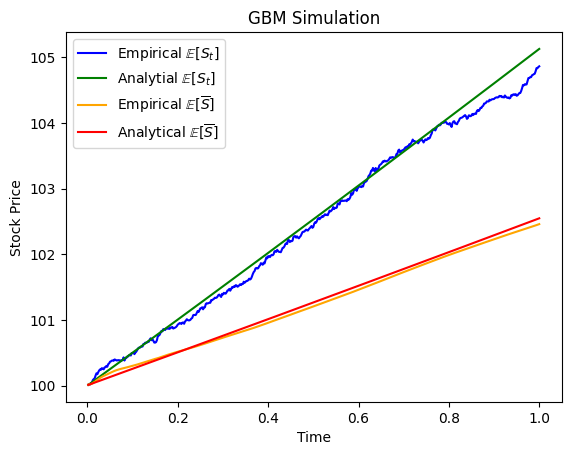

In [ ]:
N = 10000
n = 500
t = 1
S0 = 100
r = 0.05
sig = 0.4

S = GBM_N(N,n,t,S0,r,sig)

dt = t/n
k=100
time = np.array([i*dt for i in range(1,n+1)])

plt.plot(time,S.mean(axis=0),color='blue', label='Empirical $\mathbb{E}[S_t]$')

plt.plot(time,S0*np.exp(r*time),color='green', label='Analytial $\mathbb{E}[S_t]$')

sum2 = np.cumsum(S.mean(axis=0))
plt.plot(time,[1/(i+1)*sum2[i] for i in range(n)], color='orange', label='Empirical $\mathbb{E}[\overline{S}]$')

smd = np.exp(r*time)
sum = np.cumsum(smd,axis=0)
plt.plot(time,[S0/(i+1)*sum[i] for i in range(n)], color='red', label='Analytical $\mathbb{E}[\overline{S}]$')

plt.legend()
plt.title('GBM Simulation')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

Monte-Carlo pricing of the option

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


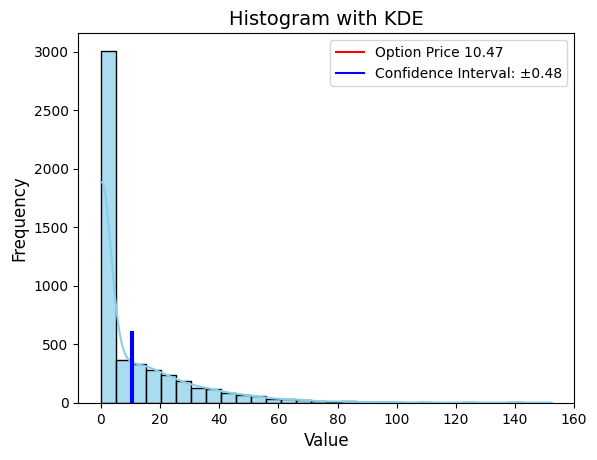

In [ ]:
N = 5000
n = 100
t = 1
S0 = 100
K = 100
r = 0.05
sig = 0.4

mc_price, ci = mc_arithmetic_assian_opt(S0, K, r, sig, N, n, t)

### Variation of GBM accuracy

In [ ]:
R = 0.05
S0 = 100
K = 100
Sig = 0.4
T = 1
n = 100
Y = []
Nn = [100,200,500,1000,2000,5000,10000,20000]

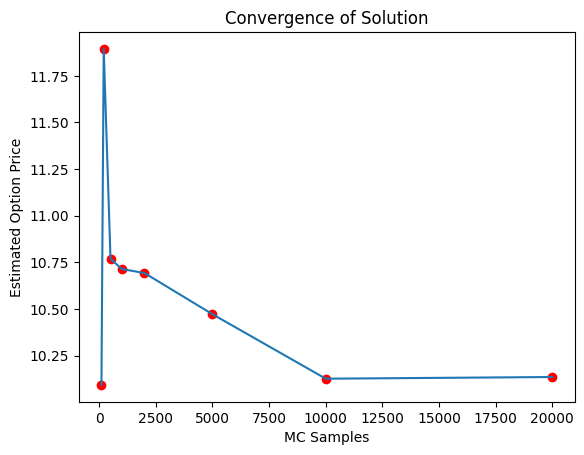

In [ ]:
for N in Nn:
  Y.append(mc_arithmetic_assian_opt(S0, K, R, Sig, N, n, T, plot=False)[0])
  plt.scatter(N, Y[-1], color='red')
plt.title('Convergence of Solution')
plt.plot(Nn,Y)
plt.xlabel('MC Samples')
plt.ylabel('Estimated Option Price')
plt.show()

## Question 2

### Variation of $r$

MC estimated option price: 9.606534806847764
Conficence interval: (np.float64(9.142247741357412), np.float64(10.070821872338115))


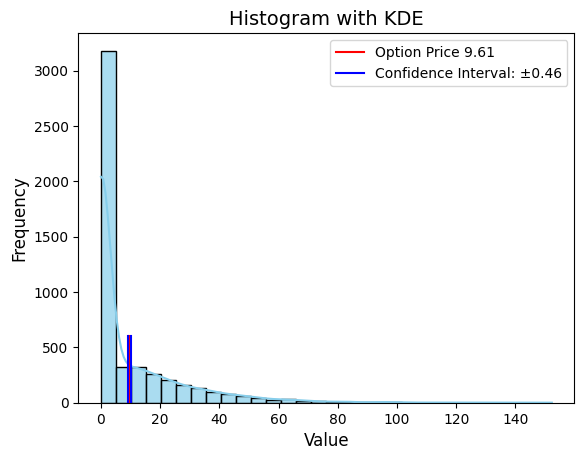

MC estimated option price: 16.400464985771634
Conficence interval: (np.float64(15.53146894937917), np.float64(17.269461022164098))


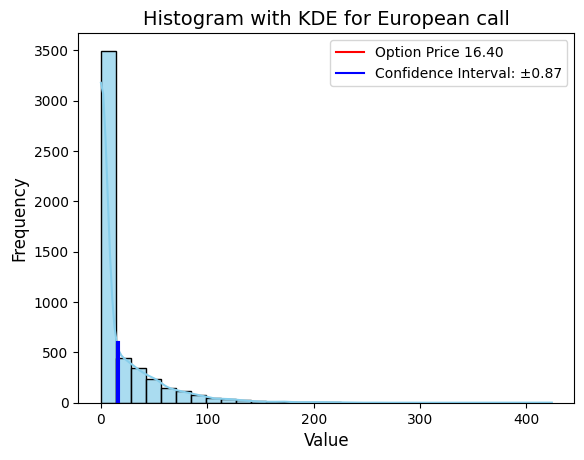

MC estimated option price: 9.701258317700617
Conficence interval: (np.float64(9.23559213281705), np.float64(10.166924502584184))


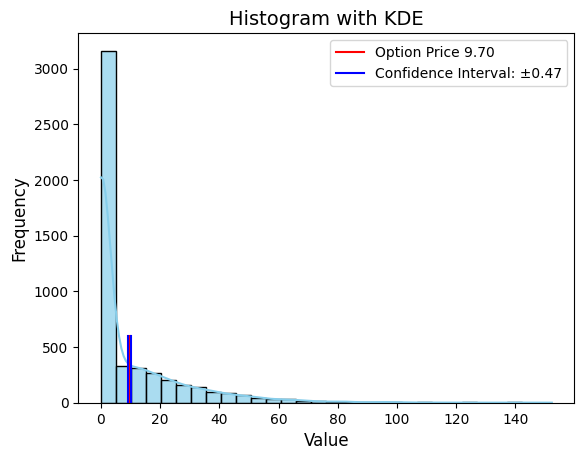

MC estimated option price: 16.609442502976172
Conficence interval: (np.float64(15.736264479805087), np.float64(17.482620526147258))


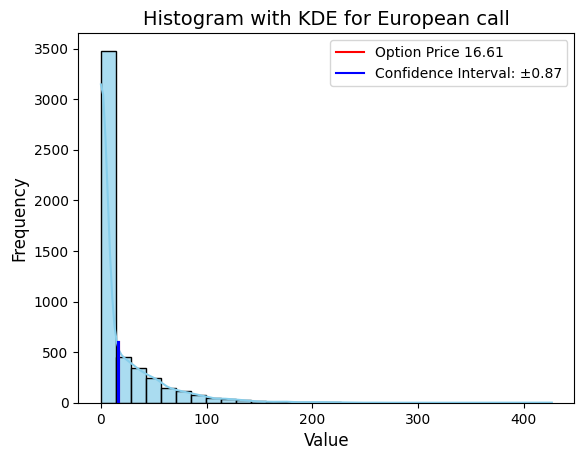

MC estimated option price: 9.891653102368242
Conficence interval: (np.float64(9.423270216403427), np.float64(10.360035988333056))


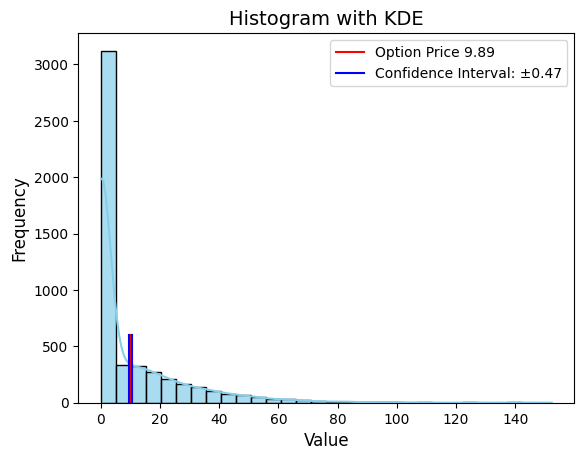

MC estimated option price: 17.03082670815516
Conficence interval: (np.float64(16.149345653034484), np.float64(17.912307763275837))


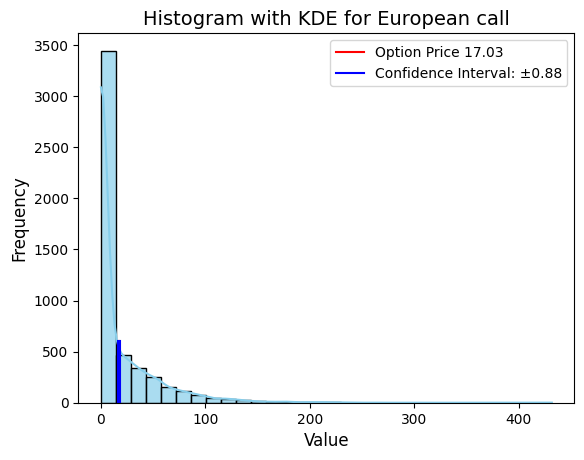

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


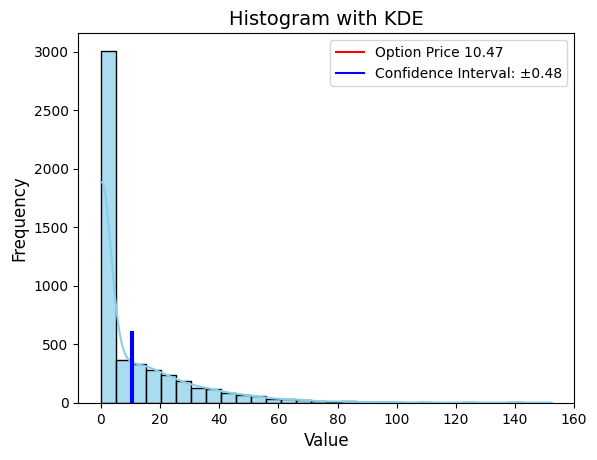

MC estimated option price: 18.311856936365395
Conficence interval: (np.float64(17.40584362130774), np.float64(19.21787025142305))


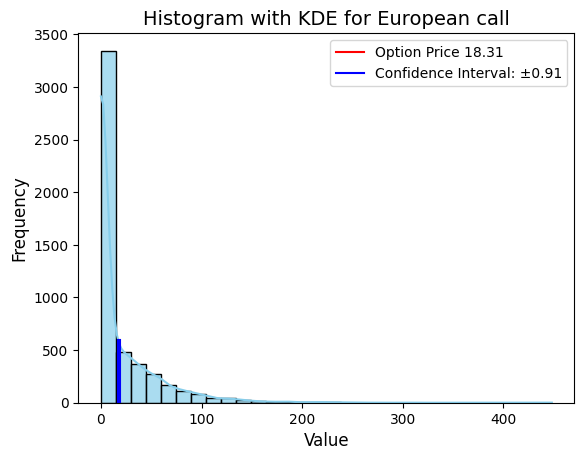

MC estimated option price: 11.464568444367229
Conficence interval: (np.float64(10.976693569109628), np.float64(11.95244331962483))


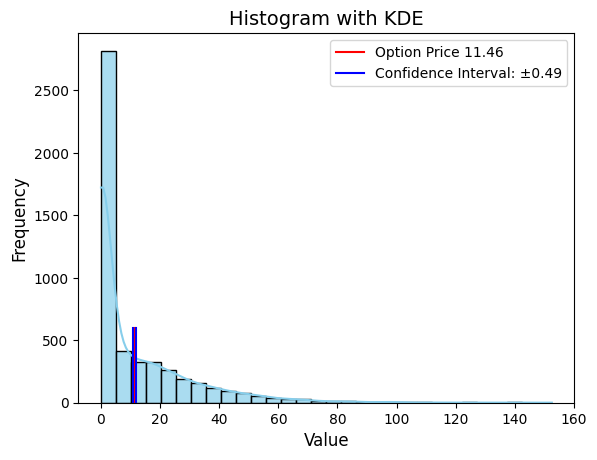

MC estimated option price: 20.54590677147785
Conficence interval: (np.float64(19.601170064204798), np.float64(21.4906434787509))


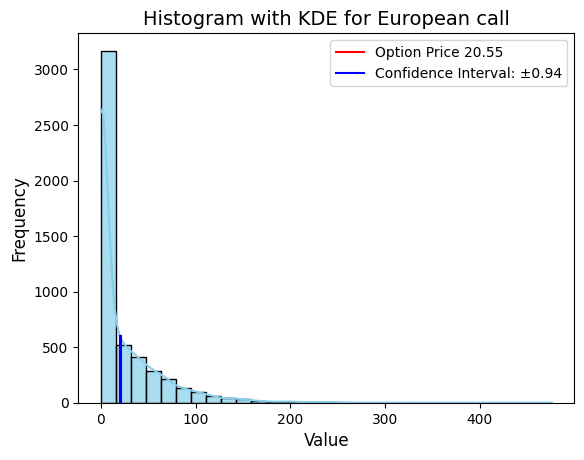

MC estimated option price: 12.480235845234729
Conficence interval: (np.float64(11.982221559393789), np.float64(12.978250131075669))


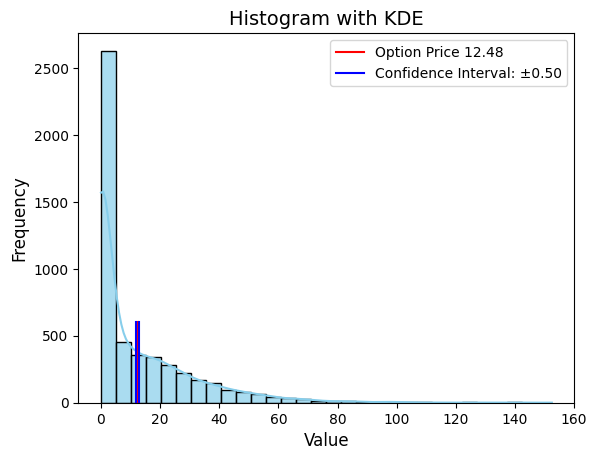

MC estimated option price: 22.890989060208945
Conficence interval: (np.float64(21.91047471209297), np.float64(23.87150340832492))


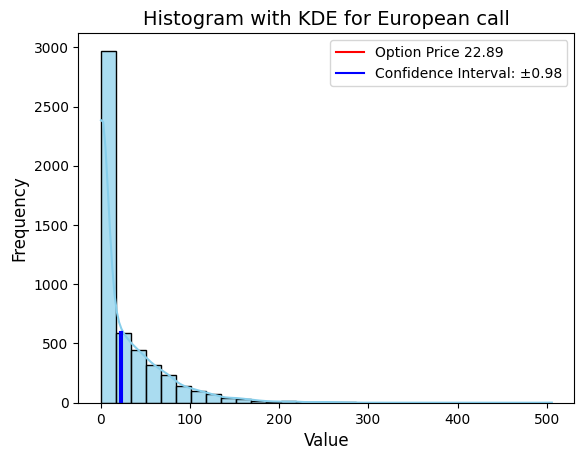

MC estimated option price: 13.505972759254277
Conficence interval: (np.float64(12.999328155177077), np.float64(14.012617363331477))


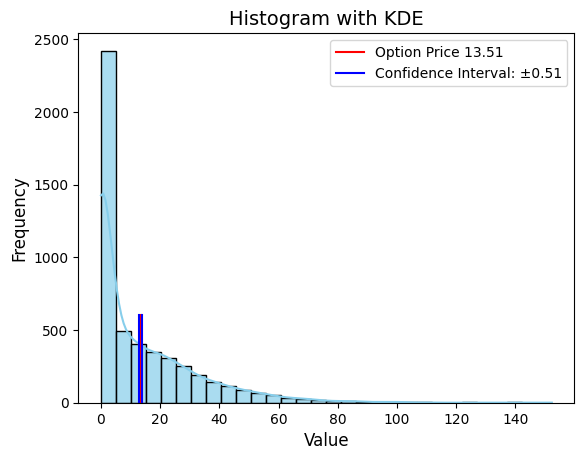

MC estimated option price: 25.323505867067055
Conficence interval: (np.float64(24.310251724961116), np.float64(26.336760009172995))


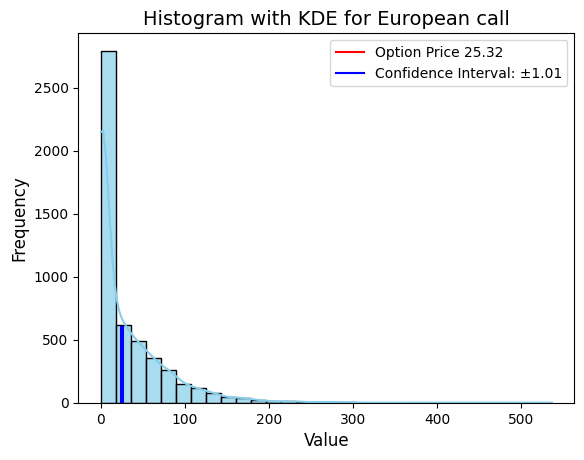

MC estimated option price: 14.535630330747045
Conficence interval: (np.float64(14.02190239549197), np.float64(15.04935826600212))


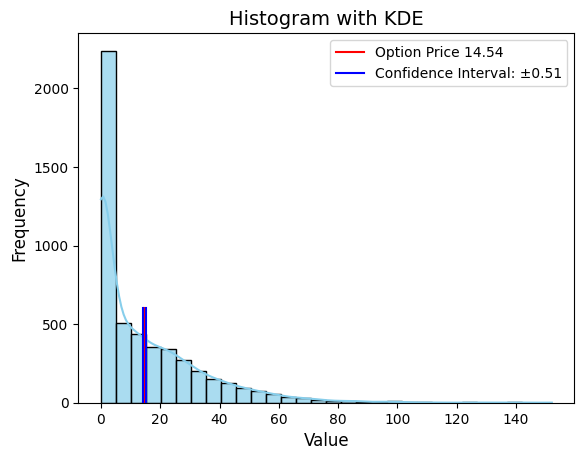

MC estimated option price: 27.845820676523335
Conficence interval: (np.float64(26.803394249993524), np.float64(28.888247103053146))


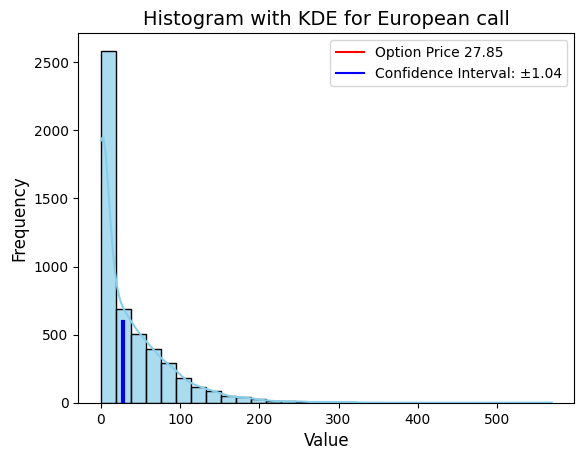

MC estimated option price: 15.561981252495135
Conficence interval: (np.float64(15.04270072459887), np.float64(16.0812617803914))


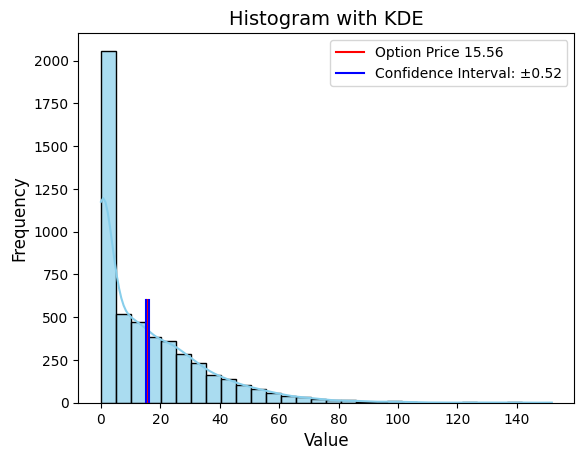

MC estimated option price: 30.4266481220274
Conficence interval: (np.float64(29.358438315227517), np.float64(31.494857928827287))


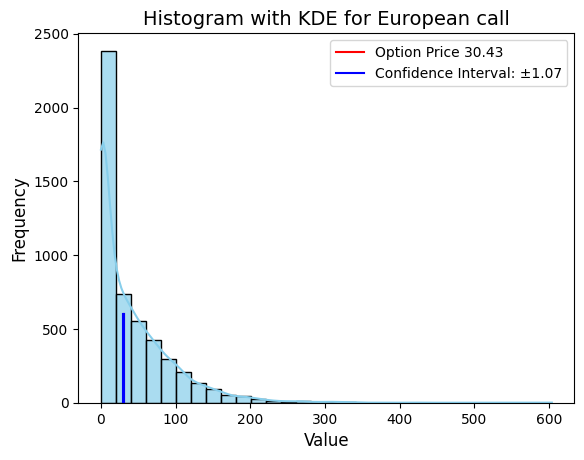

MC estimated option price: 19.53444614801248
Conficence interval: (np.float64(19.00779640725723), np.float64(20.06109588876773))


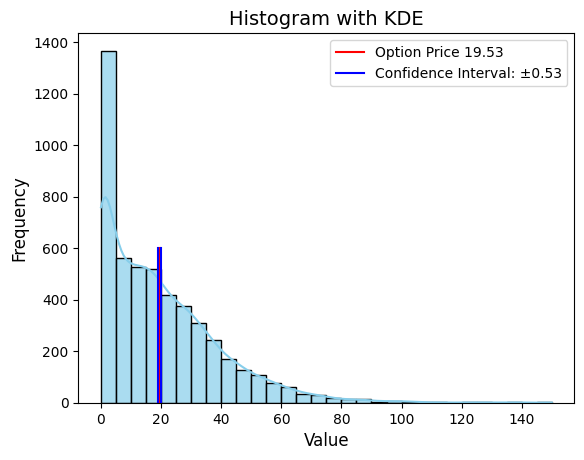

MC estimated option price: 40.8717790180365
Conficence interval: (np.float64(39.731050622847626), np.float64(42.01250741322537))


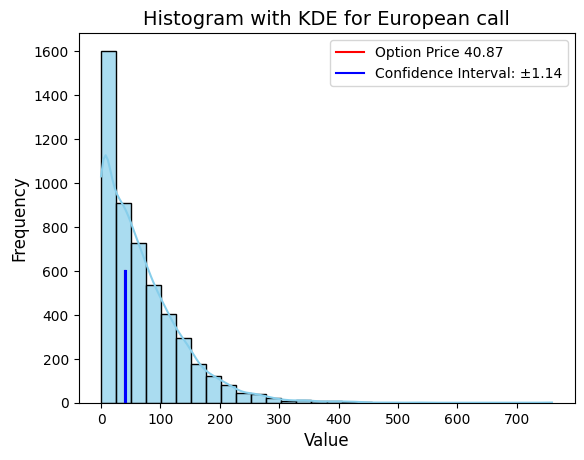

In [ ]:
S0 = 100
K = 100
Sig = 0.4
T = 1
n = 100
N = 5000
R = [0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.5]
# [0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.5,1,2,5,10]
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []
for i in range(len(R)):
  p,c = mc_arithmetic_assian_opt(S0,K,R[i],Sig,N,n,T)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0,K,R[i],Sig,N,n,T)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

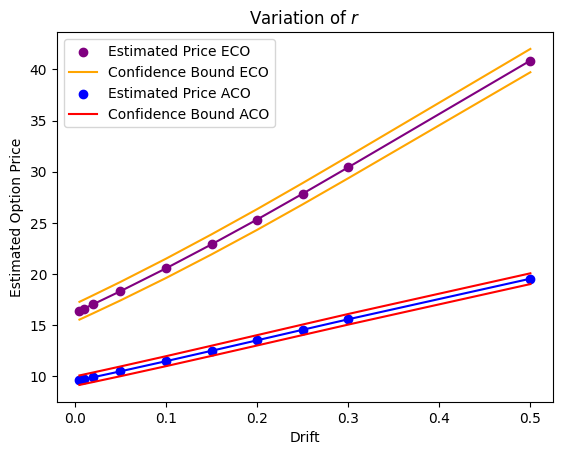

In [ ]:
plt.scatter(R,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(R,EP, color = 'purple')
plt.plot(R,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(R,EC1, color = 'orange')

plt.scatter(R,P, color = 'blue', label = 'Estimated Price ACO')
plt.plot(R,P, color = 'blue')
plt.plot(R,C2, color = 'red', label = 'Confidence Bound ACO')
plt.plot(R,C1, color = 'red')
plt.xlabel('Drift')
plt.ylabel('Estimated Option Price')
plt.legend()
plt.title('Variation of $r$')
plt.show()

Comparison of effects of $r$ on price

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3469974699.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(R,S0*np.mean(S, axis=0), color = 'brown',label='$\mathbb{E}[\overline{S}]$')
/tmp/ipython-input-3469974699.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(R,S0/np.exp(T*R)*np.mean(S, axis=0), color = 'orange',label='$e^{-rT}\mathbb{E}[\overline{S}]$')


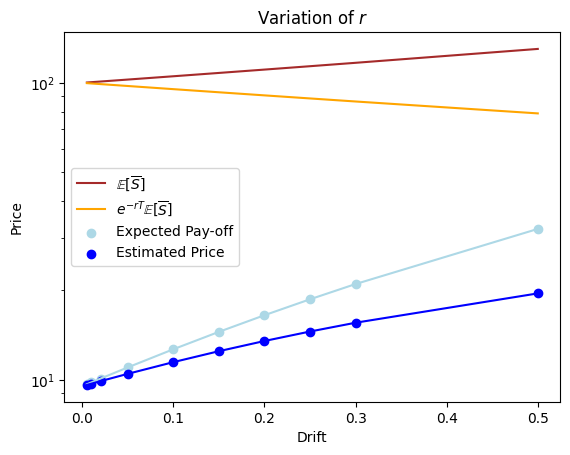

In [ ]:
dt = T/n
S = np.zeros((n,len(R)))
k=0
for k in range(len(R)):
  for i in range(1,n+1):
    S[i-1,k] = np.exp(R[k]*i*dt)
  k+=1

#plt.plot(R,S0/np.exp(T*R), color = 'red',label='$S_0e^{-rT}$')
plt.plot(R,S0*np.mean(S, axis=0), color = 'brown',label='$\mathbb{E}[\overline{S}]$')
plt.plot(R,S0/np.exp(T*R)*np.mean(S, axis=0), color = 'orange',label='$e^{-rT}\mathbb{E}[\overline{S}]$')


plt.scatter(R,np.exp(T*R)*P, color = 'lightblue', label = 'Expected Pay-off')
plt.plot(R,np.exp(T*R)*P, color = 'lightblue')

plt.scatter(R,P, color = 'blue', label = 'Estimated Price')
plt.plot(R,P, color = 'blue')
plt.xlabel('Drift')
plt.ylabel('Price')
plt.yscale('log')
plt.legend()
plt.title('Variation of $r$')
plt.show()

### Variation of $\sigma$

In [ ]:
S0 = 100
K = 100
Sig = [0.05,0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2,2.5,3,5]
T = 1
n = 100
N = 5000
R = 0.05
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []

MC estimated option price: 2.7513490162529566
Conficence interval: (np.float64(2.683072919088857), np.float64(2.819625113417056))


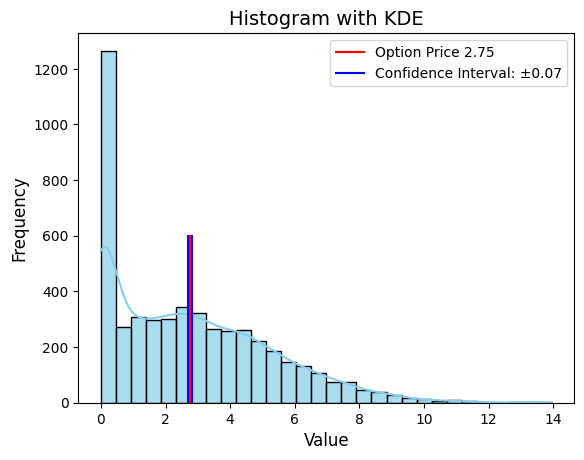

MC estimated option price: 5.2497128637024435
Conficence interval: (np.float64(5.12600930083389), np.float64(5.373416426570997))


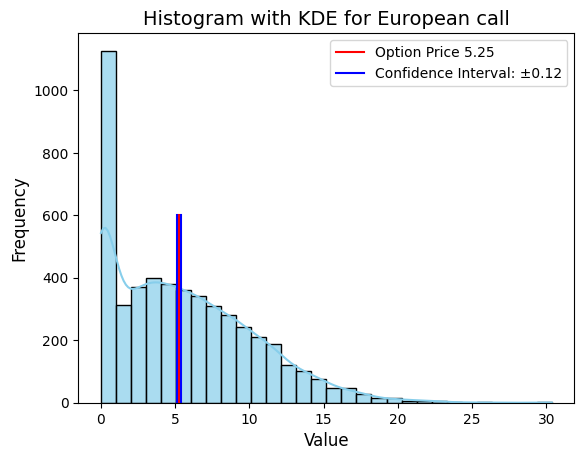

MC estimated option price: 3.7101806487046343
Conficence interval: (np.float64(3.589583159072323), np.float64(3.8307781383369455))


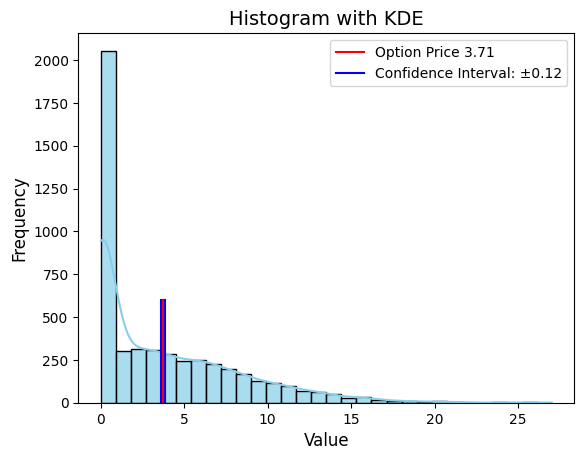

MC estimated option price: 6.772487363431391
Conficence interval: (np.float64(6.55314480499638), np.float64(6.991829921866401))


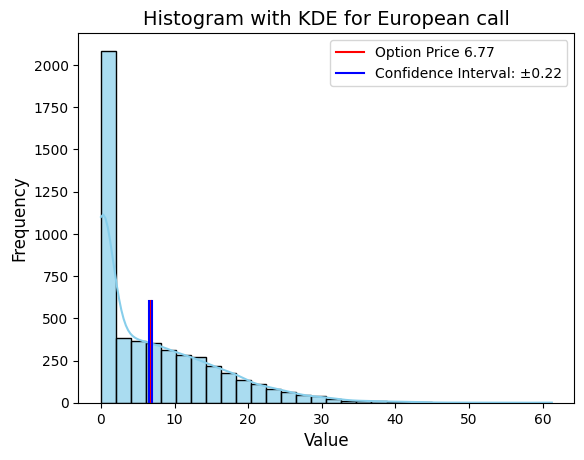

MC estimated option price: 5.909299093524387
Conficence interval: (np.float64(5.680409310596409), np.float64(6.138188876452365))


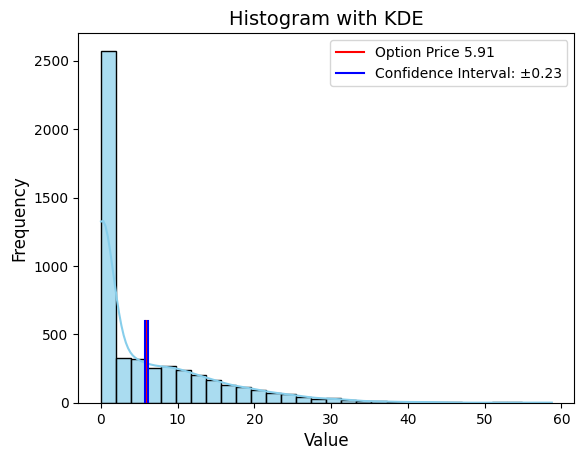

MC estimated option price: 10.477239947062177
Conficence interval: (np.float64(10.057063269497174), np.float64(10.89741662462718))


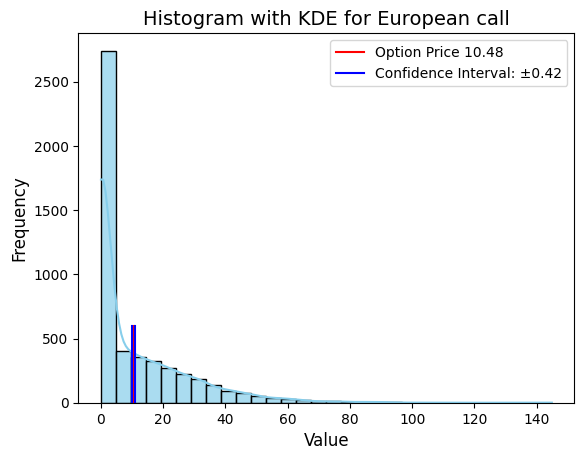

MC estimated option price: 8.179036862279858
Conficence interval: (np.float64(7.832147198528946), np.float64(8.525926526030771))


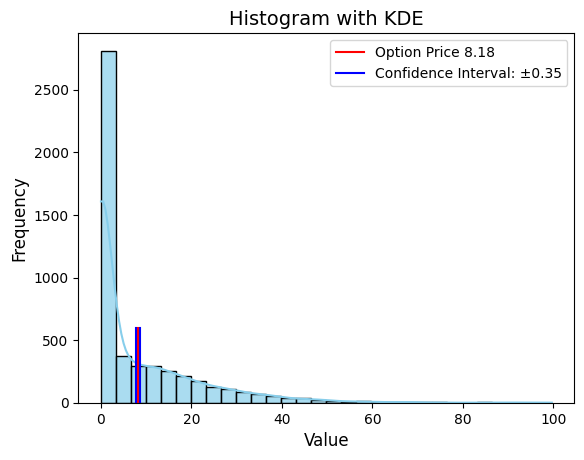

MC estimated option price: 14.364365129916074
Conficence interval: (np.float64(13.717338801462887), np.float64(15.01139145836926))


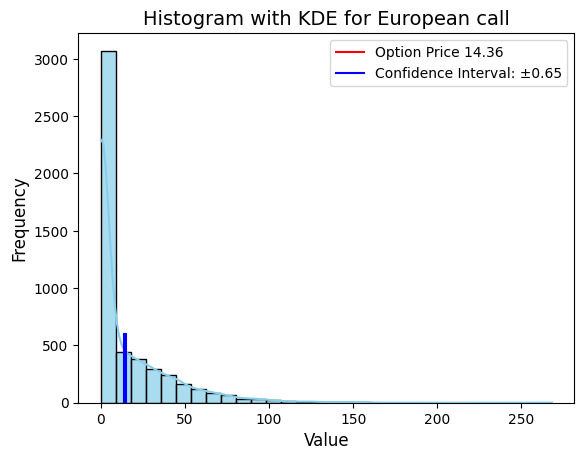

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


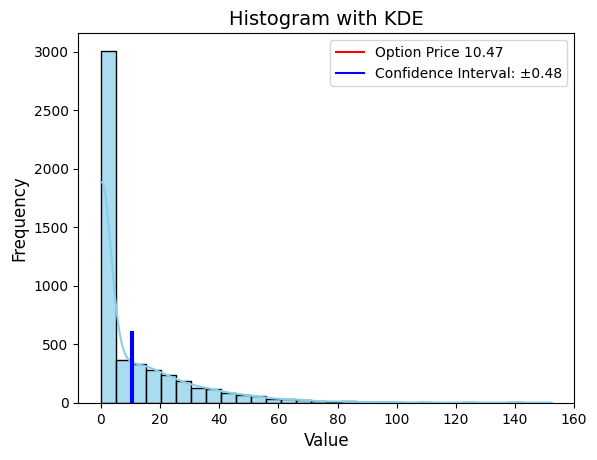

MC estimated option price: 18.311856936365395
Conficence interval: (np.float64(17.40584362130774), np.float64(19.21787025142305))


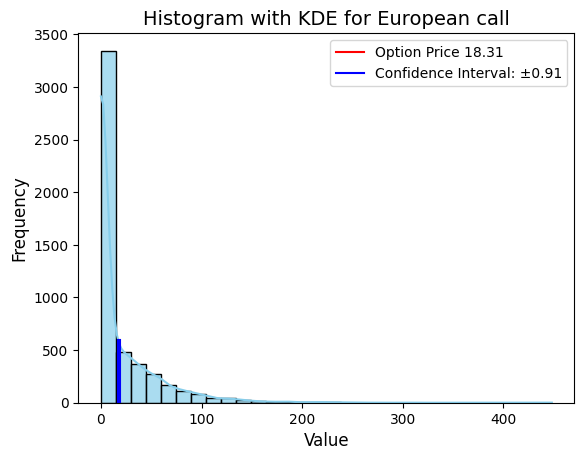

MC estimated option price: 12.777587301609671
Conficence interval: (np.float64(12.159383814382632), np.float64(13.39579078883671))


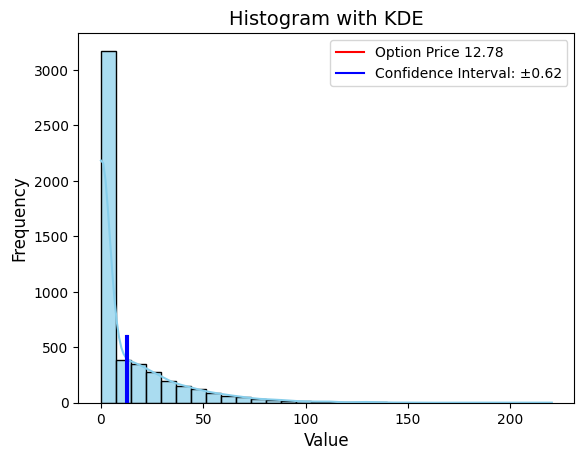

MC estimated option price: 22.29231422035966
Conficence interval: (np.float64(21.088416415250705), np.float64(23.496212025468616))


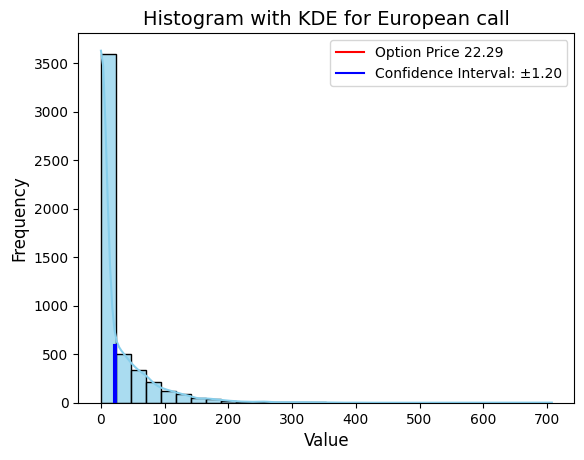

MC estimated option price: 18.5669302240657
Conficence interval: (np.float64(17.52529644655388), np.float64(19.60856400157752))


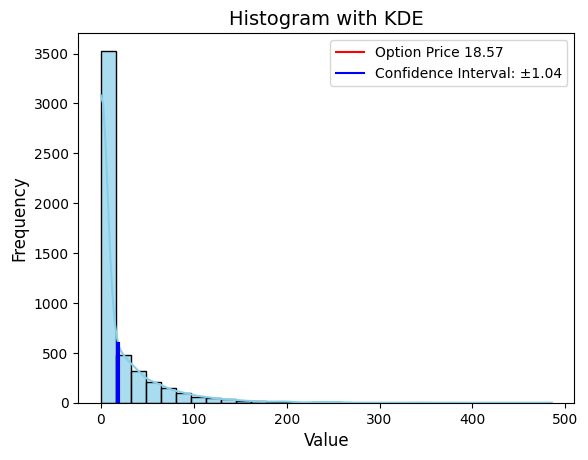

MC estimated option price: 32.29562329537108
Conficence interval: (np.float64(30.11053491553027), np.float64(34.480711675211886))


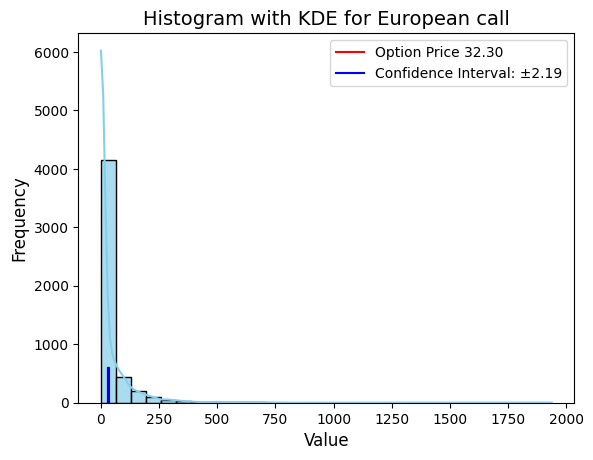

MC estimated option price: 24.37090129468248
Conficence interval: (np.float64(22.776115534889584), np.float64(25.965687054475374))


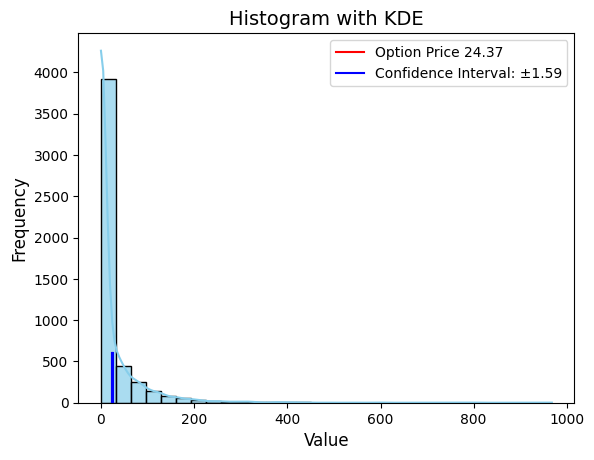

MC estimated option price: 42.41195043098506
Conficence interval: (np.float64(38.69158425657049), np.float64(46.13231660539962))


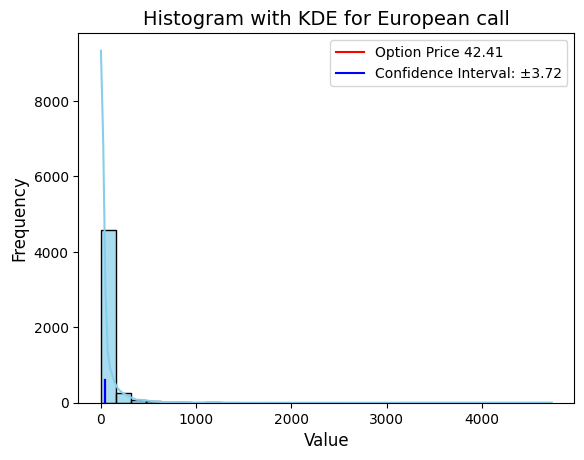

MC estimated option price: 35.93281465897608
Conficence interval: (np.float64(32.5839705621827), np.float64(39.281658755769456))


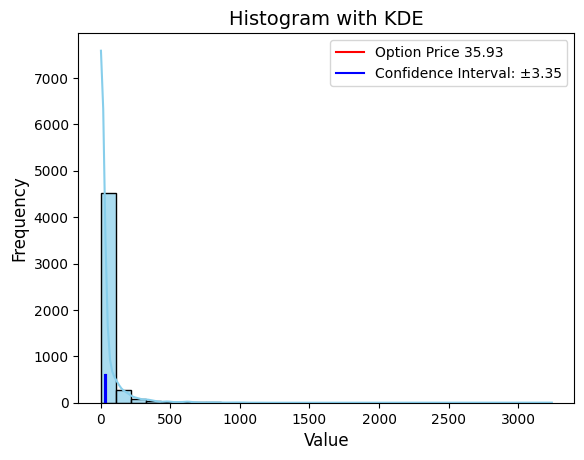

MC estimated option price: 63.46149862819115
Conficence interval: (np.float64(52.50829561072772), np.float64(74.41470164565457))


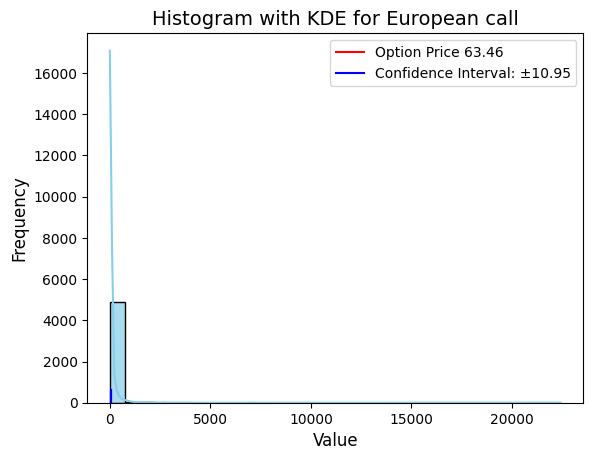

MC estimated option price: 47.43350283546719
Conficence interval: (np.float64(40.75121858330166), np.float64(54.11578708763272))


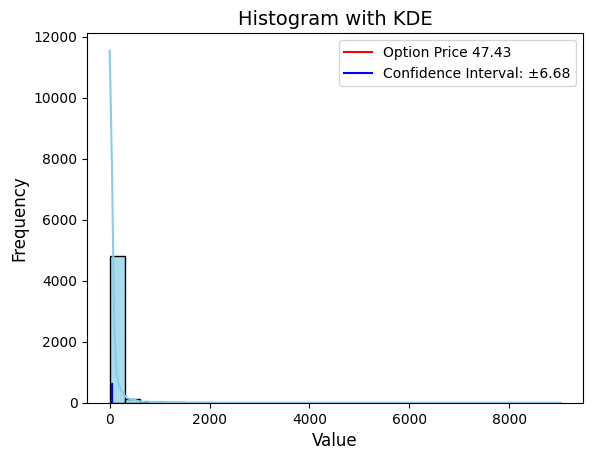

MC estimated option price: 88.46147643605475
Conficence interval: (np.float64(55.337576231896946), np.float64(121.58537664021256))


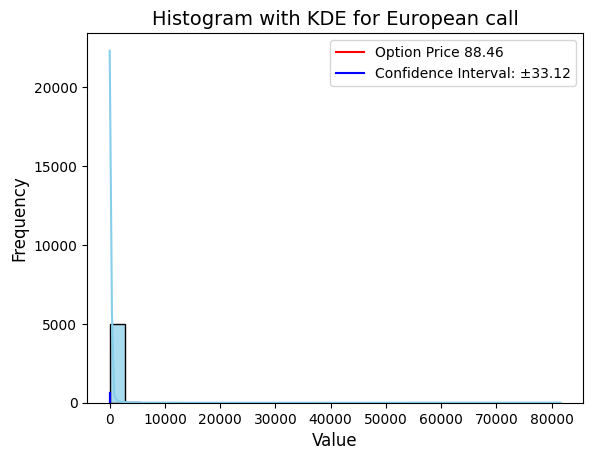

MC estimated option price: 58.90347202878947
Conficence interval: (np.float64(46.173500026370455), np.float64(71.6334440312085))


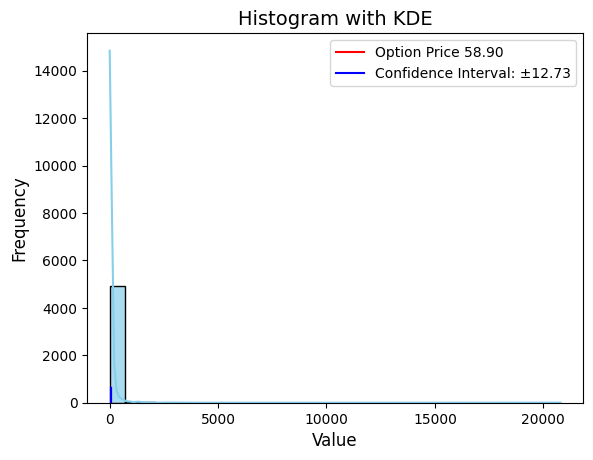

MC estimated option price: 123.13704417995125
Conficence interval: (np.float64(34.65053408226514), np.float64(211.62355427763737))


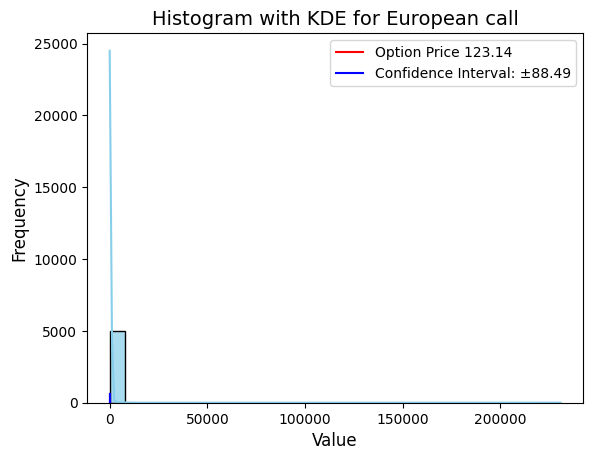

MC estimated option price: 70.04700376165793
Conficence interval: (np.float64(47.80610510972094), np.float64(92.28790241359494))


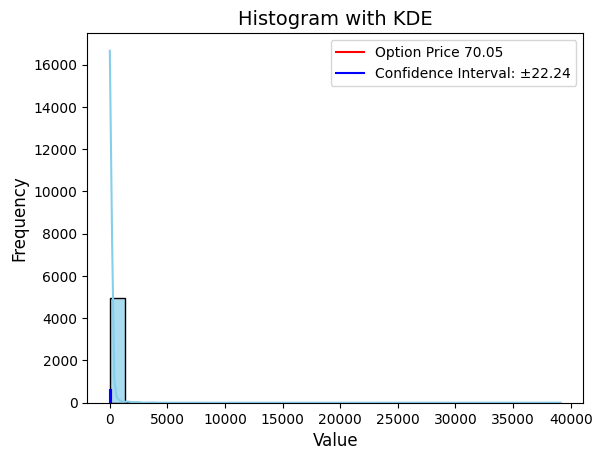

MC estimated option price: 171.68666074224677
Conficence interval: (np.float64(-19.72446795461738), np.float64(363.0977894391109))


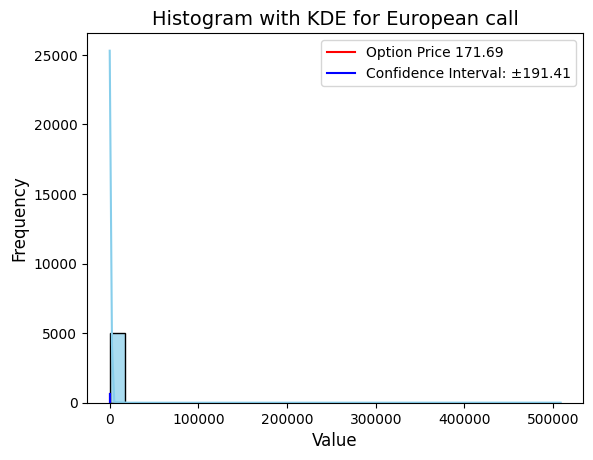

MC estimated option price: 95.67370347531984
Conficence interval: (np.float64(15.524779440379262), np.float64(175.82262751026042))


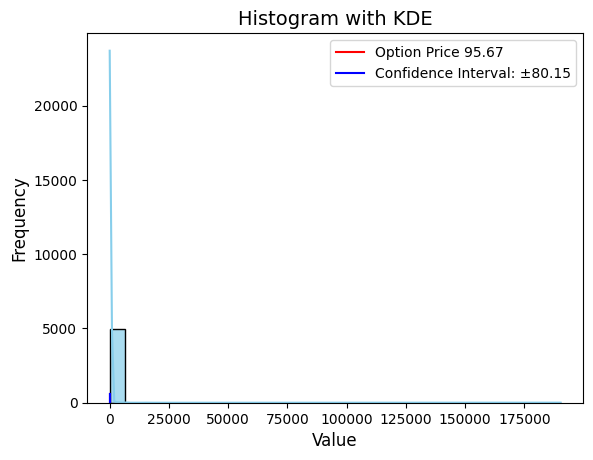

MC estimated option price: 196.13476252532507
Conficence interval: (np.float64(-169.43897024202744), np.float64(561.7084952926775))


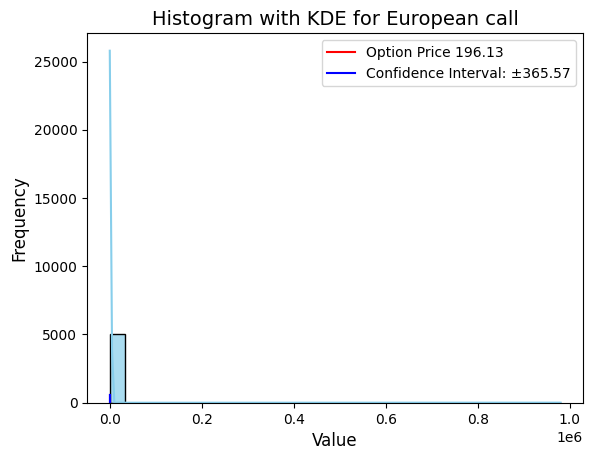

In [ ]:
for i in range(len(Sig)):
  p,c = mc_arithmetic_assian_opt(S0,K,R,Sig[i],N,n,T)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0,K,R,Sig[i],N,n,T)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1360409280.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Variation of $\sigma$')


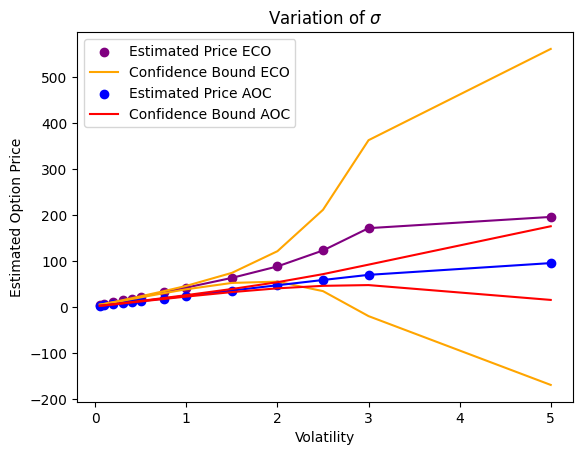

In [ ]:
plt.scatter(Sig,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(Sig,EP, color = 'purple')
plt.plot(Sig,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(Sig,EC1, color = 'orange')

plt.scatter(Sig,P, color = 'blue', label = 'Estimated Price AOC')
plt.plot(Sig,P, color = 'blue')
plt.plot(Sig,C2, color = 'red', label = 'Confidence Bound AOC')
plt.plot(Sig,C1, color = 'red')
plt.xlabel('Volatility')
plt.ylabel('Estimated Option Price')
plt.title('Variation of $\sigma$')
plt.legend()
plt.show()

### Variation of Strike $K$

In [ ]:
S0 = 100
K = [0,25,50,75,100,125,150,200]
Sig = 0.4
T = 1
n = 100
N = 5000
R = 0.05
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []

In [ ]:
for i in range(len(K)):
  p,c = mc_arithmetic_assian_opt(S0,K[i],R,Sig,N,n,T,plot=False)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0,K[i],R,Sig,N,n,T,plot=False)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

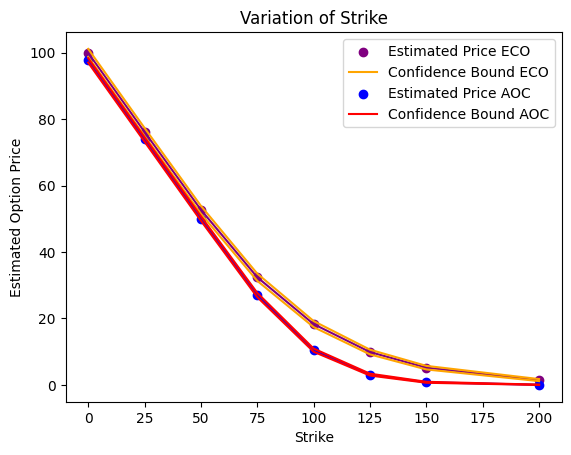

In [ ]:
plt.scatter(K,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(K,EP, color = 'purple')
plt.plot(K,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(K,EC1, color = 'orange')

plt.scatter(K,P, color = 'blue', label = 'Estimated Price AOC')
plt.plot(K,P, color = 'blue')
plt.plot(K,C2, color = 'red', label = 'Confidence Bound AOC')
plt.plot(K,C1, color = 'red')
plt.xlabel('Strike')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Strike')
plt.legend()
plt.show()

### Variation of Baseline $S_0$

In [ ]:
S0 = [25,50,75,100,125,150,200]
# in our analysis we see that 25 is too small
K = 100
Sig = 0.4
T = 1
n = 100
N = 5000
R = 0.05
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []

/usr/local/lib/python3.12/dist-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.12/dist-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


MC estimated option price: 0.0
Conficence interval: (np.float64(nan), np.float64(nan))


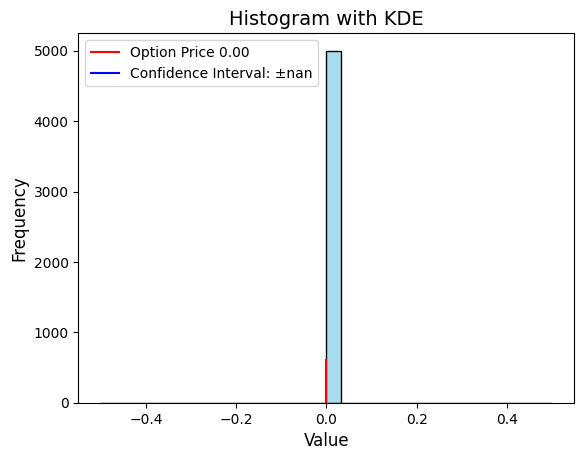

MC estimated option price: 0.007132548357049062
Conficence interval: (np.float64(-0.0066705132614271285), np.float64(0.02093560997552525))


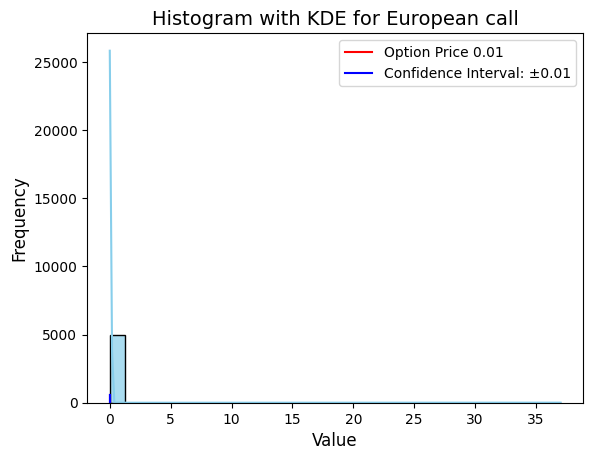

MC estimated option price: 0.029491769574122584
Conficence interval: (np.float64(0.00909153214869177), np.float64(0.0498920069995534))


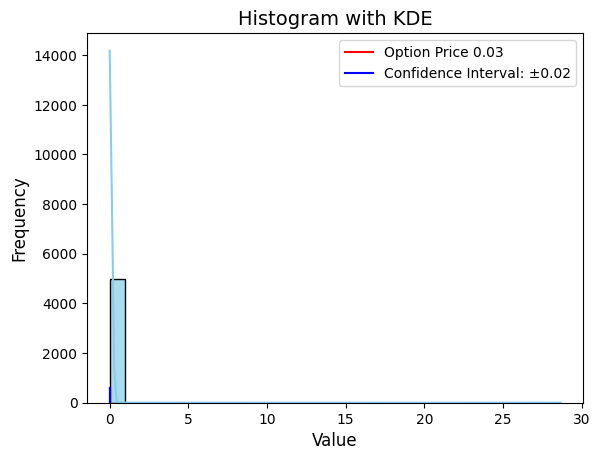

MC estimated option price: 0.7349932025662325
Conficence interval: (np.float64(0.5826398619304571), np.float64(0.8873465432020078))


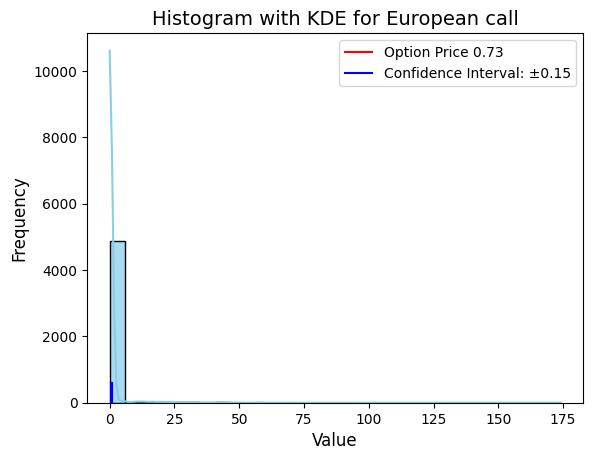

MC estimated option price: 1.5140151575917717
Conficence interval: (np.float64(1.3436976529845914), np.float64(1.684332662198952))


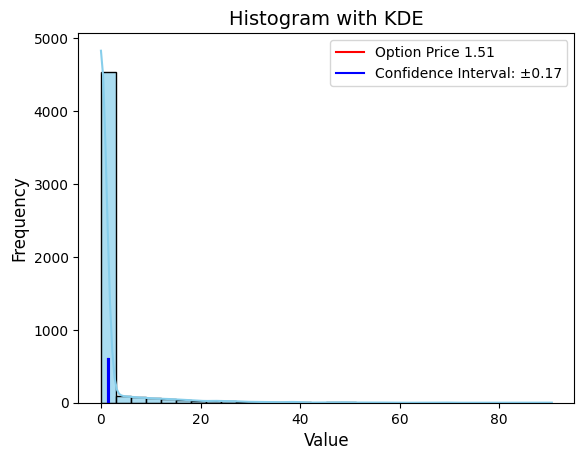

MC estimated option price: 6.004792629312021
Conficence interval: (np.float64(5.519287285054759), np.float64(6.490297973569284))


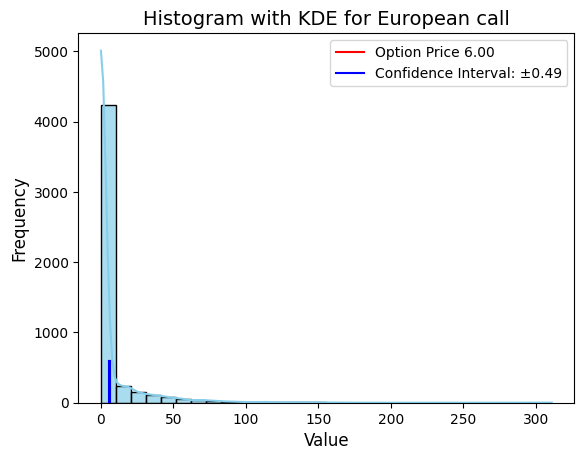

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


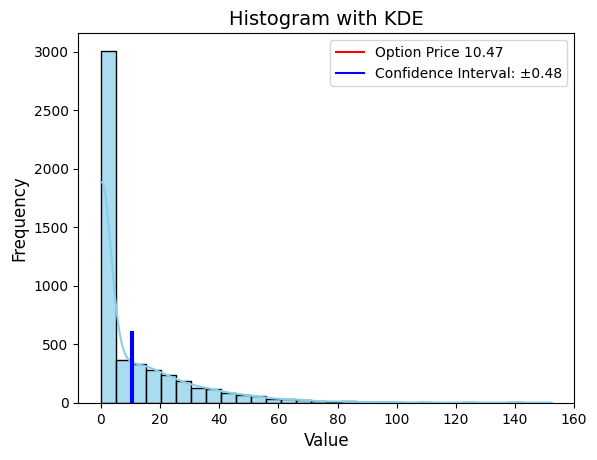

MC estimated option price: 18.311856936365395
Conficence interval: (np.float64(17.40584362130774), np.float64(19.21787025142305))


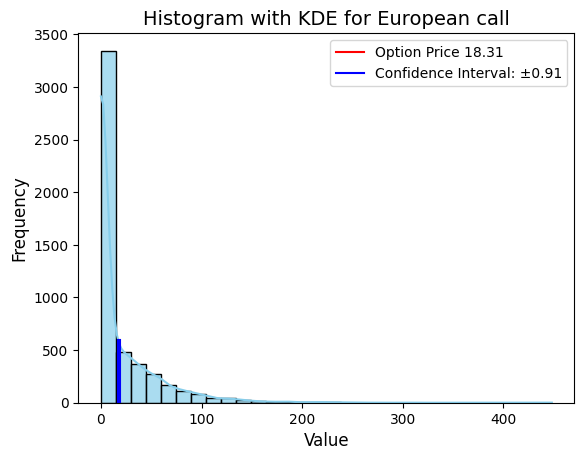

MC estimated option price: 28.747284099708473
Conficence interval: (np.float64(27.97865353896569), np.float64(29.515914660451255))


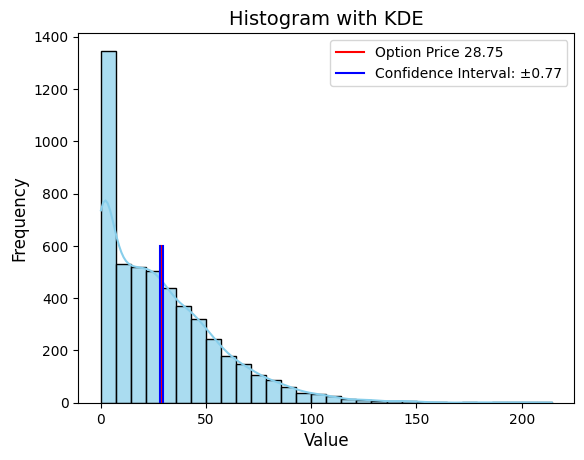

MC estimated option price: 36.293220709108944
Conficence interval: (np.float64(34.974747975544126), np.float64(37.61169344267376))


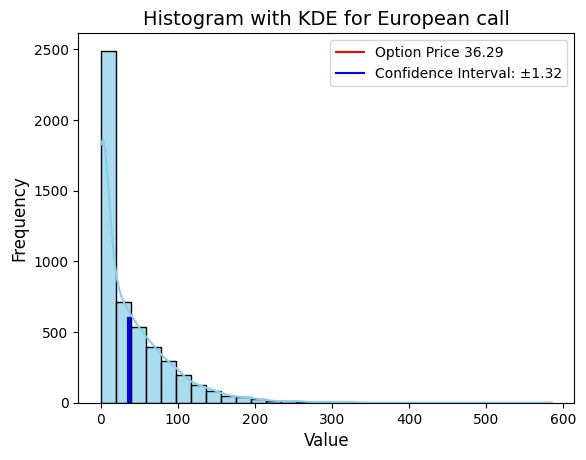

MC estimated option price: 51.60497790452156
Conficence interval: (np.float64(50.61962570453839), np.float64(52.59033010450473))


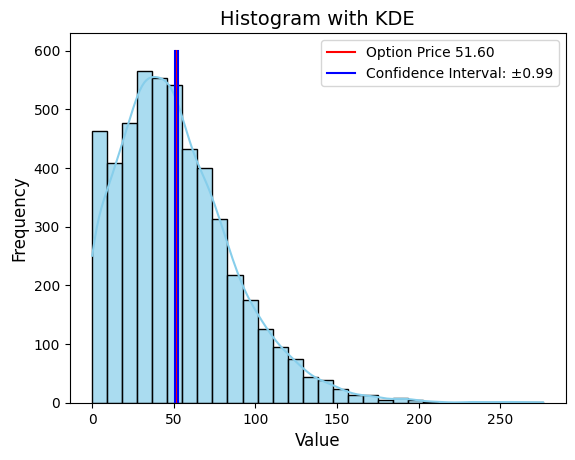

MC estimated option price: 57.8566967354138
Conficence interval: (np.float64(56.16421037274403), np.float64(59.54918309808357))


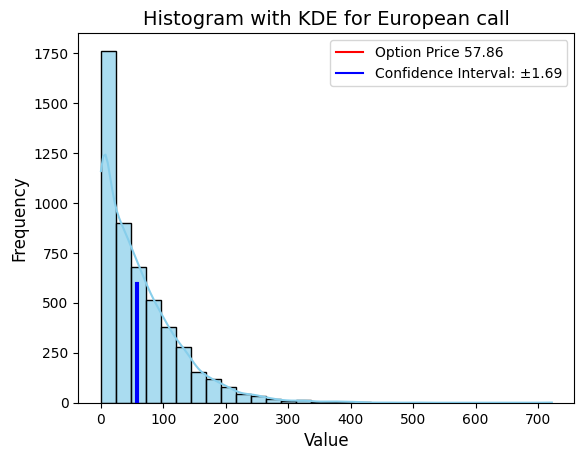

MC estimated option price: 100.13716199574945
Conficence interval: (np.float64(98.8066452804401), np.float64(101.46767871105881))


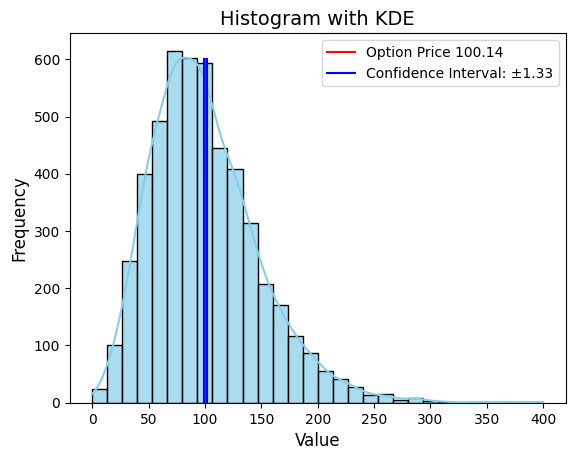

MC estimated option price: 105.39524863732767
Conficence interval: (np.float64(103.03728786165262), np.float64(107.75320941300272))


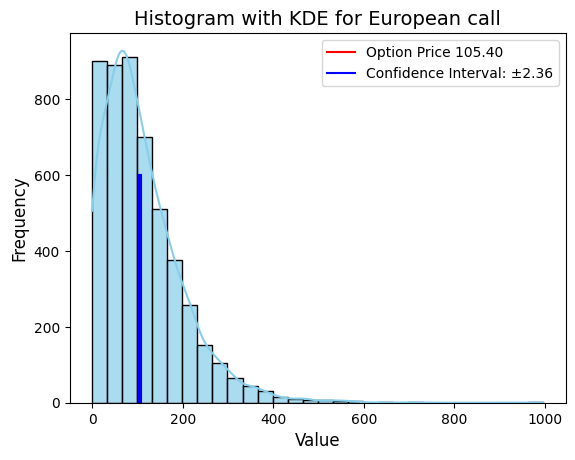

In [ ]:
for i in range(len(S0)):
  p,c = mc_arithmetic_assian_opt(S0[i],K,R,Sig,N,n,T)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0[i],K,R,Sig,N,n,T)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

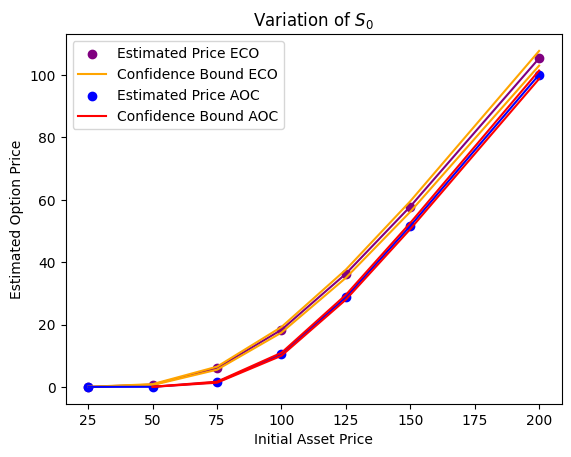

In [ ]:
plt.scatter(S0,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(S0,EP, color = 'purple')
plt.plot(S0,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(S0,EC1, color = 'orange')

plt.scatter(S0,P, color = 'blue', label = 'Estimated Price AOC' )
plt.plot(S0,P, color = 'blue')
plt.plot(S0,C2, color = 'red', label = 'Confidence Bound AOC')
plt.plot(S0,C1, color = 'red')
plt.xlabel('Initial Asset Price')
plt.ylabel('Estimated Option Price')
plt.title('Variation of $S_0$')
plt.legend()
plt.show()

Behavior of the standard error/confidence interval

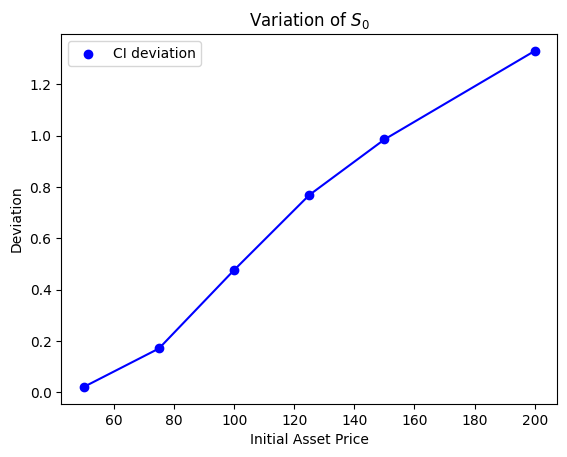

In [ ]:
plt.scatter(S0,np.array(P)-np.array(C1), color = 'blue', label = 'CI deviation')
plt.plot(S0,np.array(P)-np.array(C1), color = 'blue')
plt.xlabel('Initial Asset Price')
plt.ylabel('Deviation')
plt.title('Variation of $S_0$')
plt.legend()
plt.show()

### Baseline/Stike difference: $S_0-K$

In [ ]:
S0 = [25,50,75,100,125,150,175,200]
K = [25,50,75,100,125,150,175,200]
Sig = 0.4
T = 1
n = 100
N = 5000
R = 0.05

MC estimated option price: 2.617859301345174
Conficence interval: (np.float64(2.498816756228425), np.float64(2.736901846461923))


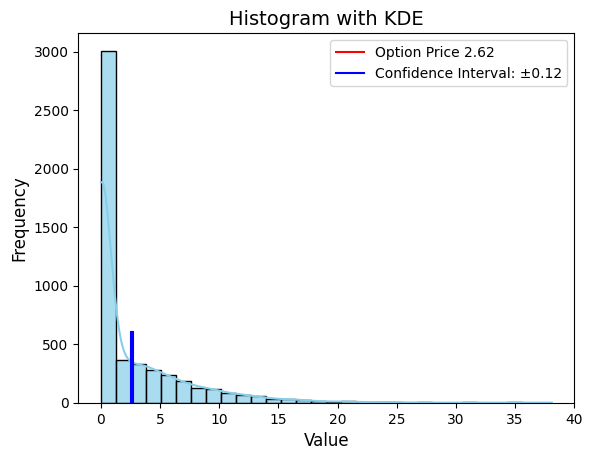

MC estimated option price: 4.577964234091349
Conficence interval: (np.float64(4.351460905326935), np.float64(4.804467562855763))


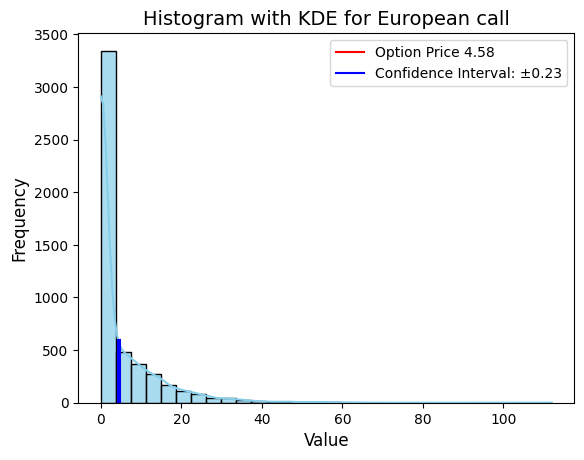

MC estimated option price: 5.235718602690348
Conficence interval: (np.float64(4.99763351245685), np.float64(5.473803692923846))


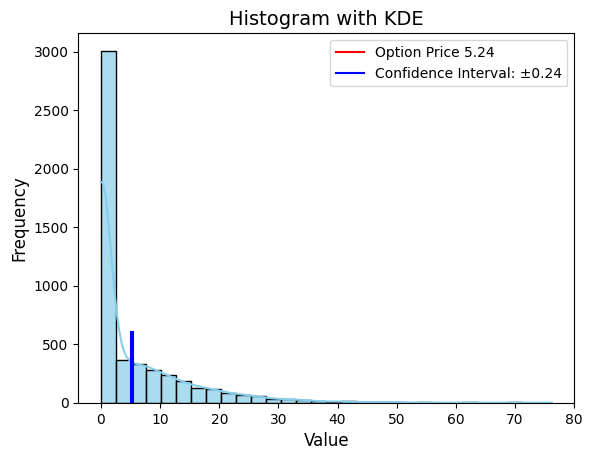

MC estimated option price: 9.155928468182697
Conficence interval: (np.float64(8.70292181065387), np.float64(9.608935125711525))


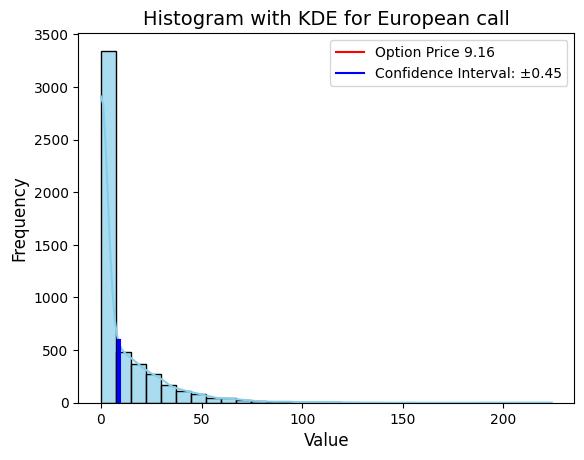

MC estimated option price: 7.8535779040355225
Conficence interval: (np.float64(7.496450268685275), np.float64(8.210705539385769))


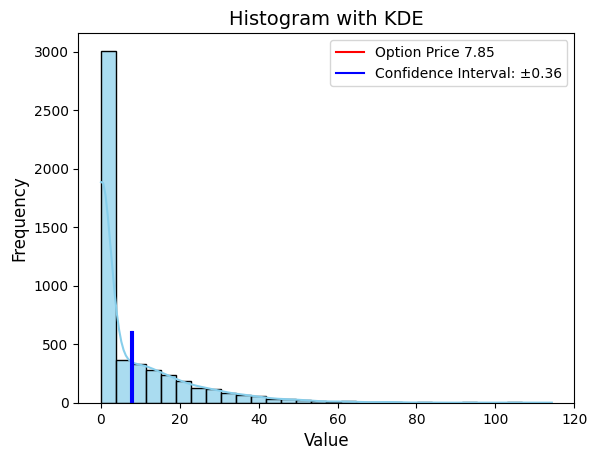

MC estimated option price: 13.733892702274044
Conficence interval: (np.float64(13.054382715980802), np.float64(14.413402688567286))


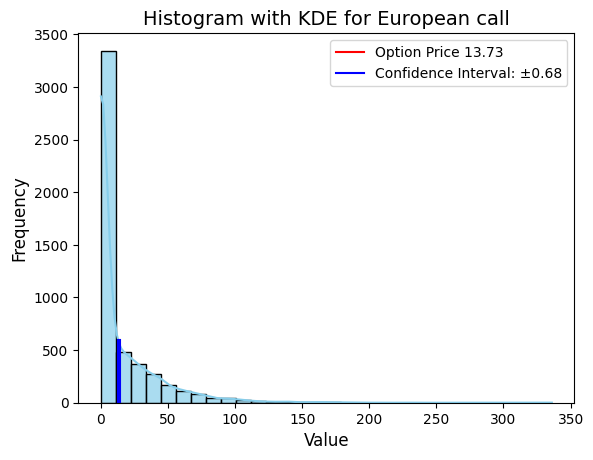

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


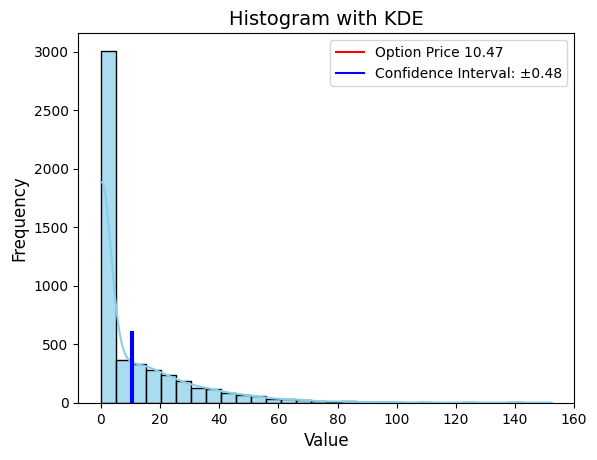

MC estimated option price: 18.311856936365395
Conficence interval: (np.float64(17.40584362130774), np.float64(19.21787025142305))


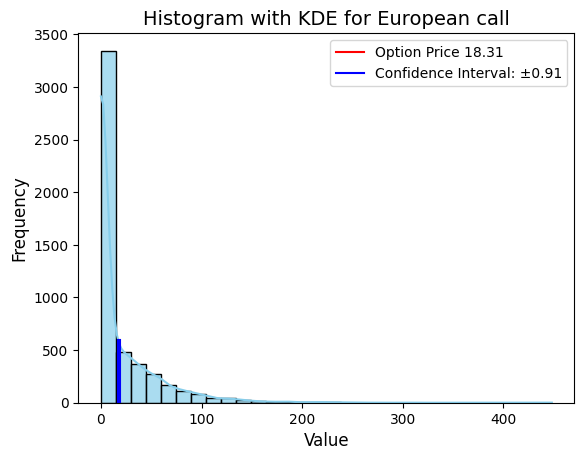

MC estimated option price: 13.089296506725871
Conficence interval: (np.float64(12.494083781142127), np.float64(13.684509232309615))


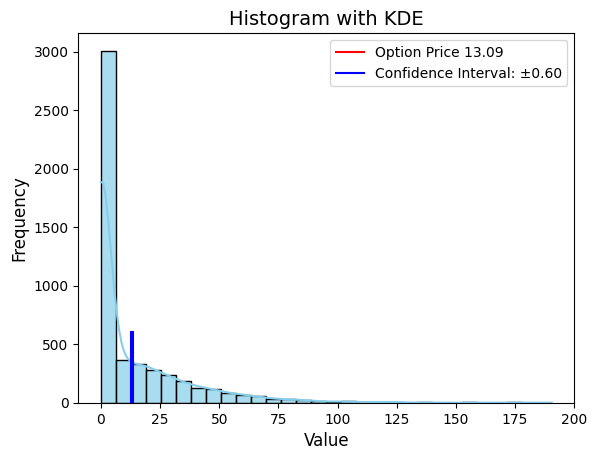

MC estimated option price: 22.88982117045674
Conficence interval: (np.float64(21.757304526634673), np.float64(24.02233781427881))


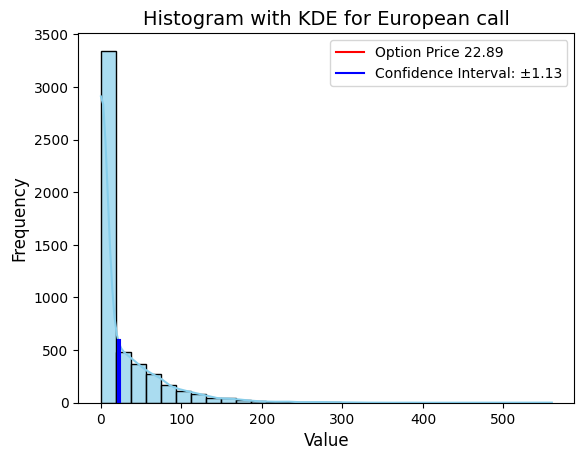

MC estimated option price: 15.707155808071045
Conficence interval: (np.float64(14.99290053737055), np.float64(16.421411078771538))


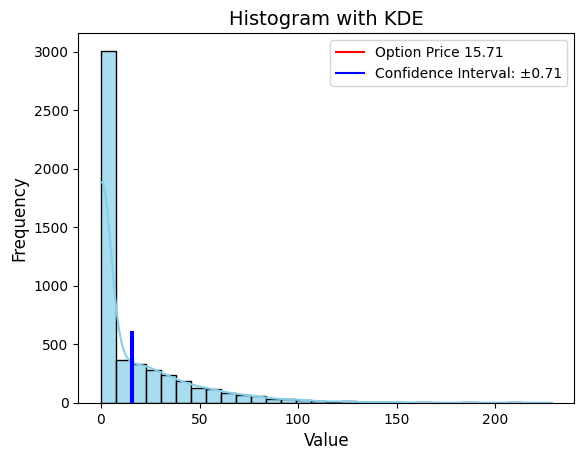

MC estimated option price: 27.46778540454809
Conficence interval: (np.float64(26.108765431961604), np.float64(28.826805377134573))


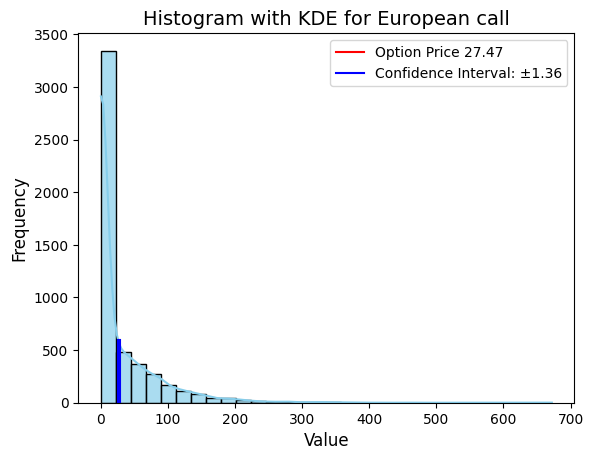

MC estimated option price: 18.32501510941622
Conficence interval: (np.float64(17.491717293598978), np.float64(19.158312925233464))


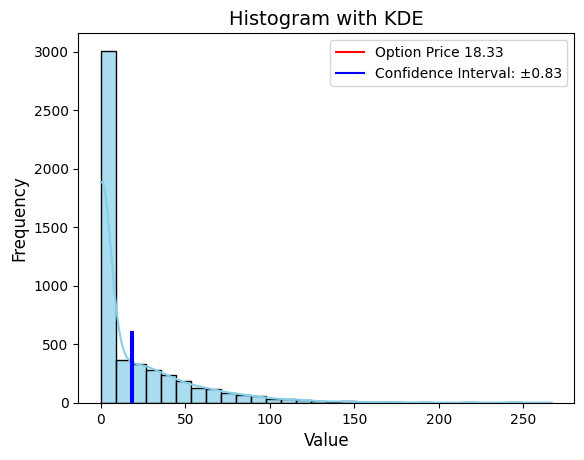

MC estimated option price: 32.045749638639435
Conficence interval: (np.float64(30.46022633728854), np.float64(33.63127293999033))


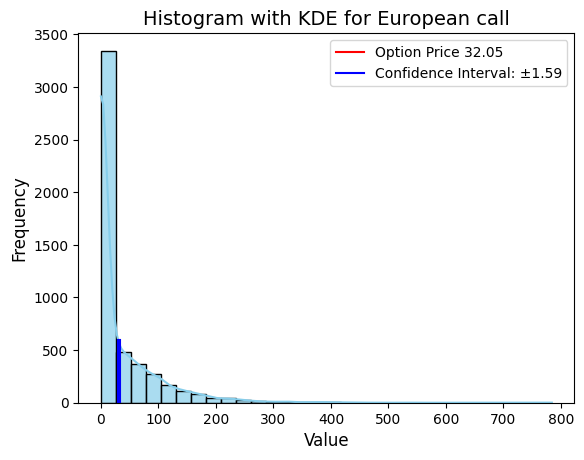

MC estimated option price: 20.94287441076139
Conficence interval: (np.float64(19.9905340498274), np.float64(21.895214771695382))


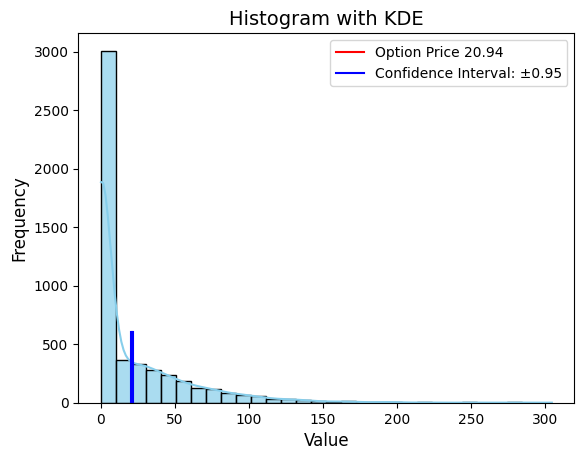

MC estimated option price: 36.62371387273079
Conficence interval: (np.float64(34.81168724261548), np.float64(38.4357405028461))


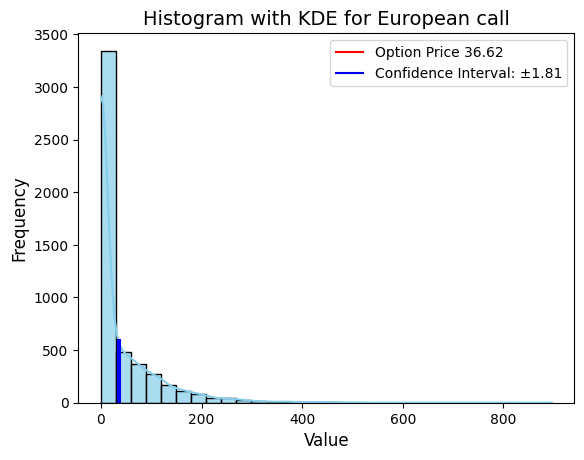

In [ ]:
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []
for i in range(len(S0)):
  p,c = mc_arithmetic_assian_opt(S0[i],K[i],R,Sig,N,n,T)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0[i],K[i],R,Sig,N,n,T)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

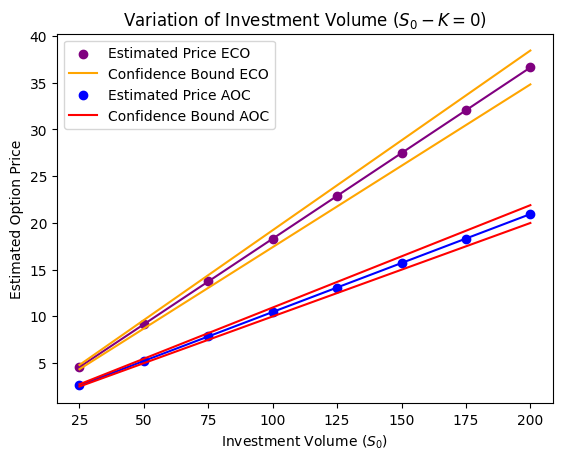

In [ ]:
plt.scatter(S0,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(S0,EP, color = 'purple')
plt.plot(S0,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(S0,EC1, color = 'orange')

plt.scatter(S0,P, color = 'blue', label = 'Estimated Price AOC')
plt.plot(S0,P, color = 'blue')
plt.plot(S0,C2, color = 'red', label = 'Confidence Bound AOC')
plt.plot(S0,C1, color = 'red')
plt.xlabel('Investment Volume ($S_0$)')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Investment Volume ($S_0-K=0$)')
plt.legend()
plt.show()

MC estimated option price: 25.034290498937363
Conficence interval: (np.float64(24.701661320110023), np.float64(25.366919677764702))


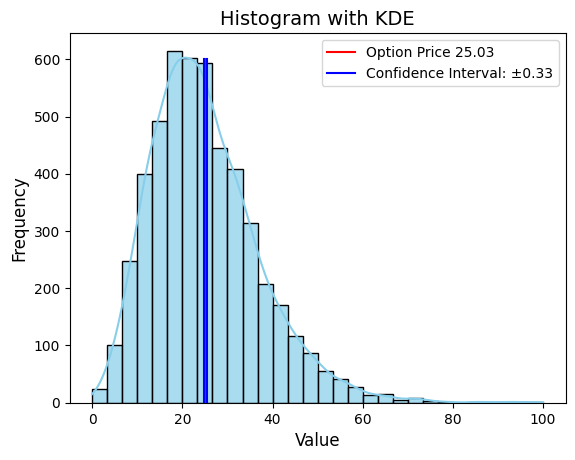

MC estimated option price: 26.348812159331917
Conficence interval: (np.float64(25.759321965413154), np.float64(26.93830235325068))


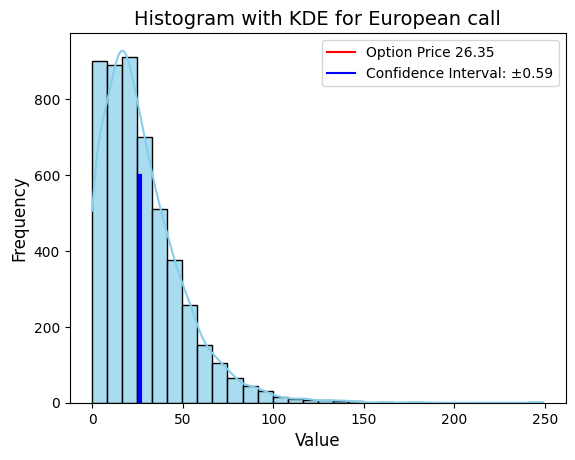

MC estimated option price: 25.80248895226078
Conficence interval: (np.float64(25.309812852269197), np.float64(26.295165052252365))


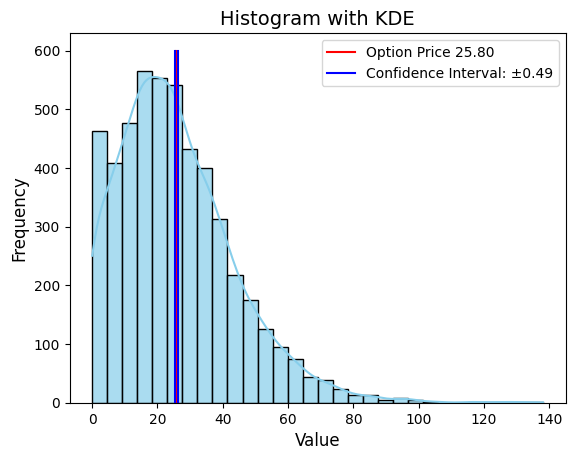

MC estimated option price: 28.9283483677069
Conficence interval: (np.float64(28.082105186372015), np.float64(29.774591549041784))


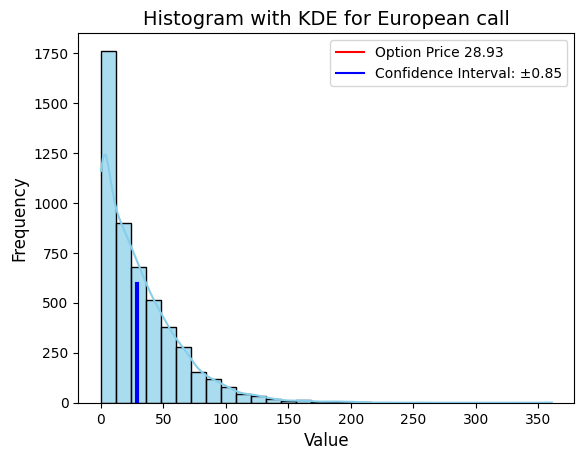

MC estimated option price: 27.053528994695714
Conficence interval: (np.float64(26.417250480397023), np.float64(27.689807508994406))


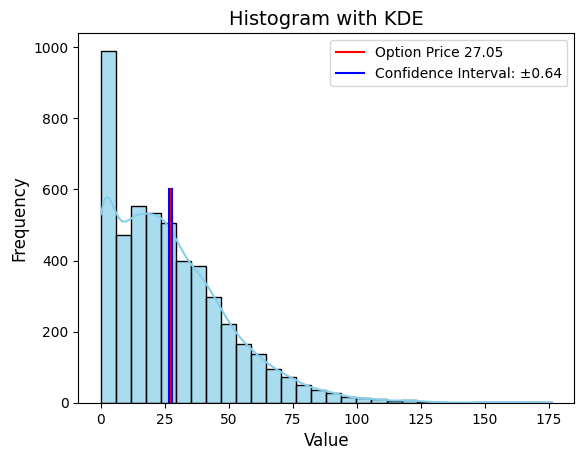

MC estimated option price: 32.40055962402299
Conficence interval: (np.float64(31.315202313458254), np.float64(33.48591693458772))


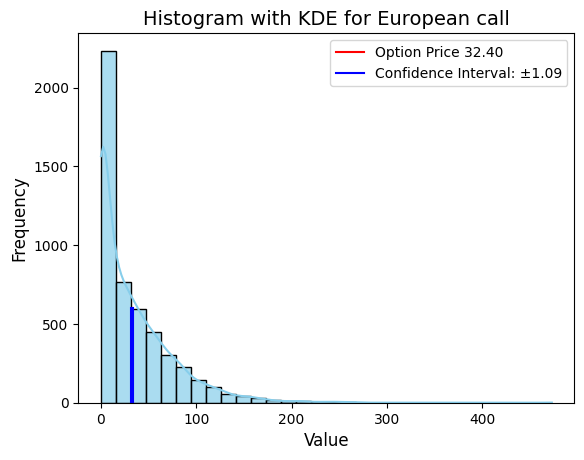

MC estimated option price: 28.747284099708473
Conficence interval: (np.float64(27.97865353896569), np.float64(29.515914660451255))


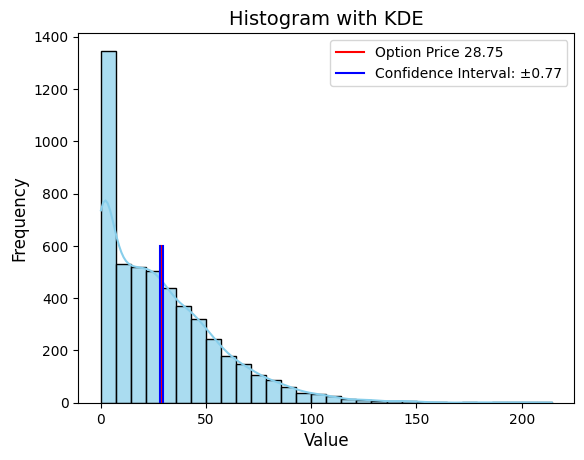

MC estimated option price: 36.293220709108944
Conficence interval: (np.float64(34.974747975544126), np.float64(37.61169344267376))


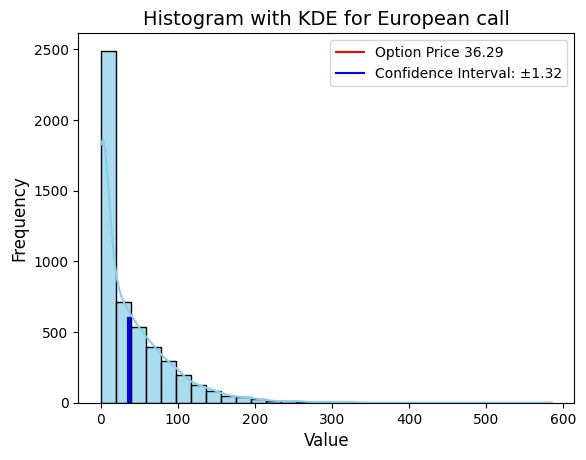

MC estimated option price: 30.71155171254217
Conficence interval: (np.float64(29.81587848199698), np.float64(31.607224943087363))


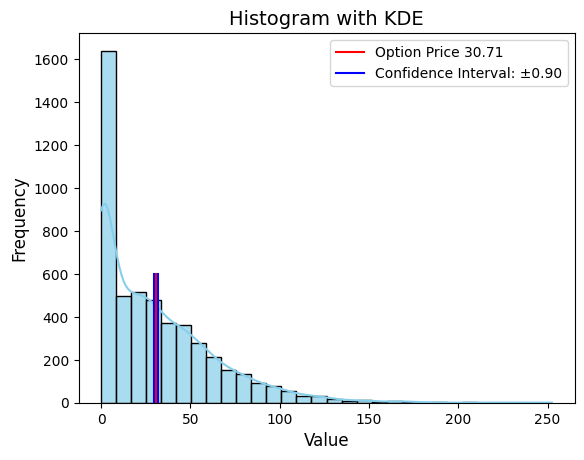

MC estimated option price: 40.41686415926295
Conficence interval: (np.float64(38.868065194805254), np.float64(41.965663123720645))


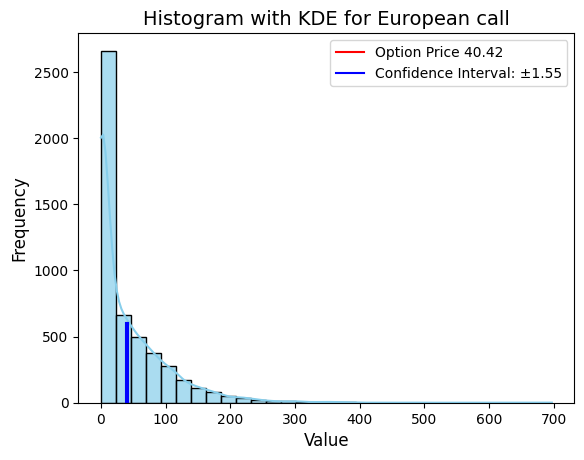

MC estimated option price: 32.837737687066
Conficence interval: (np.float64(31.817556896641403), np.float64(33.8579184774906))


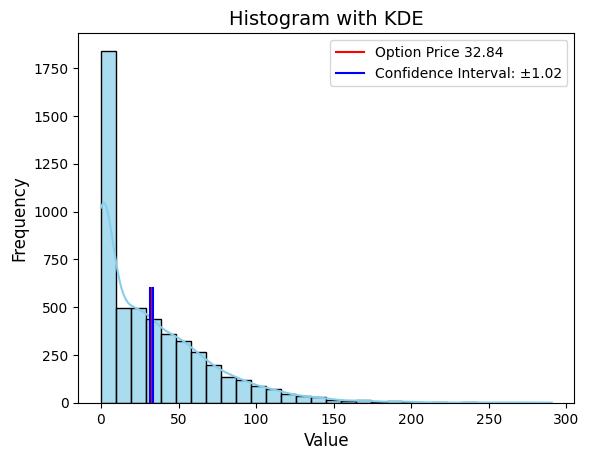

MC estimated option price: 44.67631808853776
Conficence interval: (np.float64(42.8986314832387), np.float64(46.45400469383682))


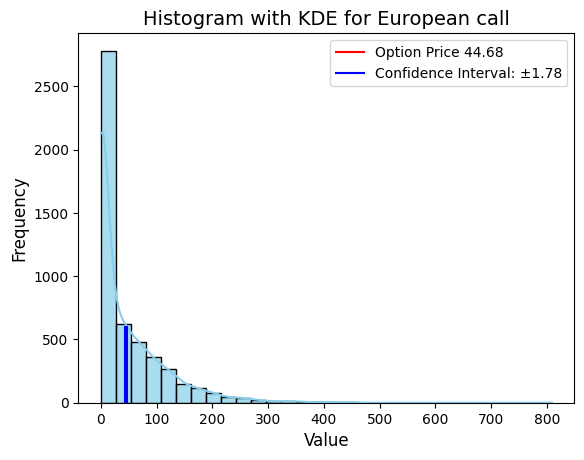

MC estimated option price: 35.08226129361255
Conficence interval: (np.float64(33.93929011912691), np.float64(36.225232468098184))


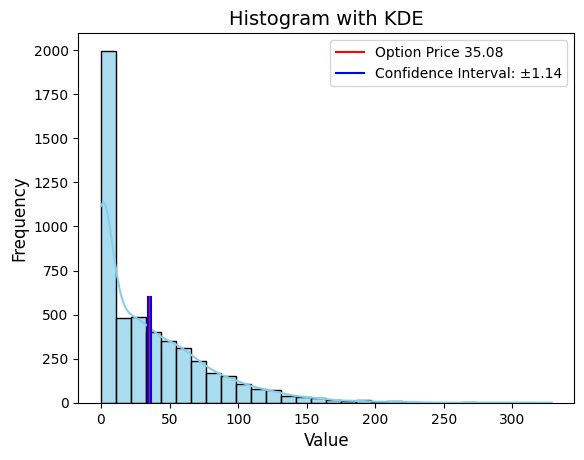

MC estimated option price: 49.0244566817301
Conficence interval: (np.float64(47.018767515361716), np.float64(51.030145848098485))


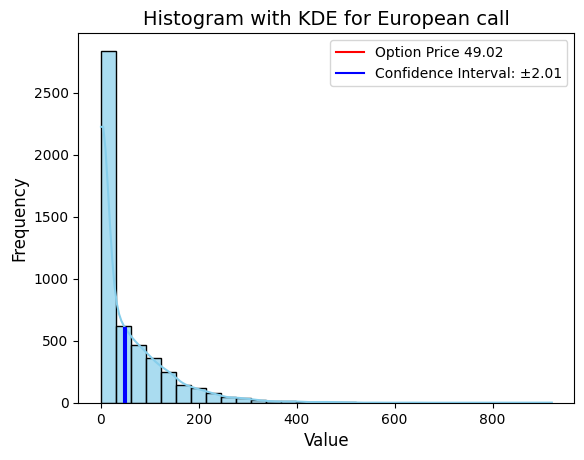

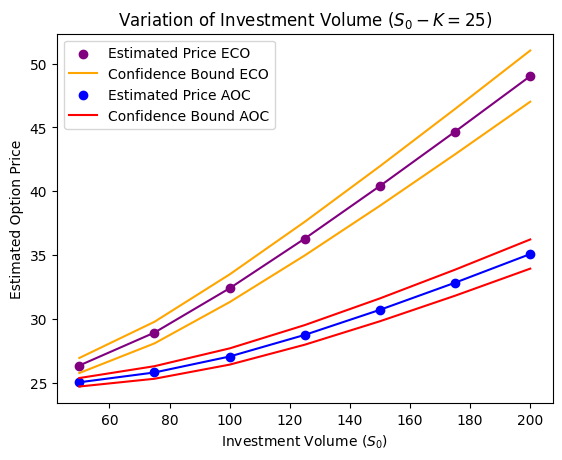

In [ ]:
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []
for i in range(len(S0)-1):
  p,c = mc_arithmetic_assian_opt(S0[i+1],K[i],R,Sig,N,n,T)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0[i+1],K[i],R,Sig,N,n,T)
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

plt.scatter(S0[1:],EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(S0[1:],EP, color = 'purple')
plt.plot(S0[1:],EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(S0[1:],EC1, color = 'orange')

plt.scatter(S0[1:],P, color = 'blue', label = 'Estimated Price AOC')
plt.plot(S0[1:],P, color = 'blue')
plt.plot(S0[1:],C2, color = 'red', label = 'Confidence Bound AOC')
plt.plot(S0[1:],C1, color = 'red')
plt.xlabel('Investment Volume ($S_0$)')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Investment Volume ($S_0-K=25$)')
plt.legend()
plt.show()

### Variation of Maturity $T$

In [ ]:
S0 = 100
K = 100
Sig = 0.4
T = [0.1,0.2,0.5,1,2,5,10]
dt = 1/100
n = [int(t/dt) for t in T] # adjust to keep discretisation accuracy
N = 5000
R = 0.05
P = []
C1 = []
C2 = []
EP = []
EC1 = []
EC2 = []

MC estimated option price: 3.3413972980656967
Conficence interval: (np.float64(3.2027360004076835), np.float64(3.48005859572371))


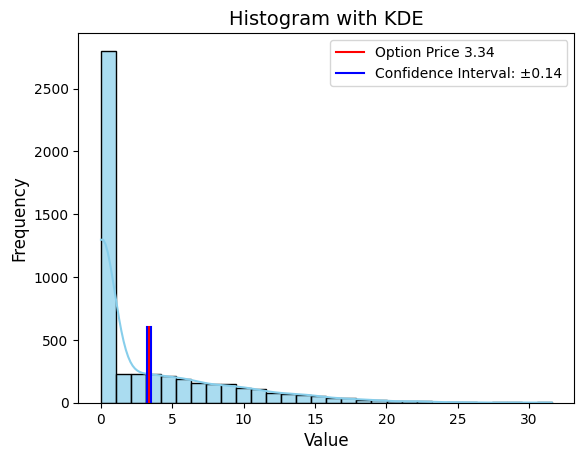

MC estimated option price: 5.375854952774478
Conficence interval: (np.float64(5.149587418872729), np.float64(5.602122486676228))


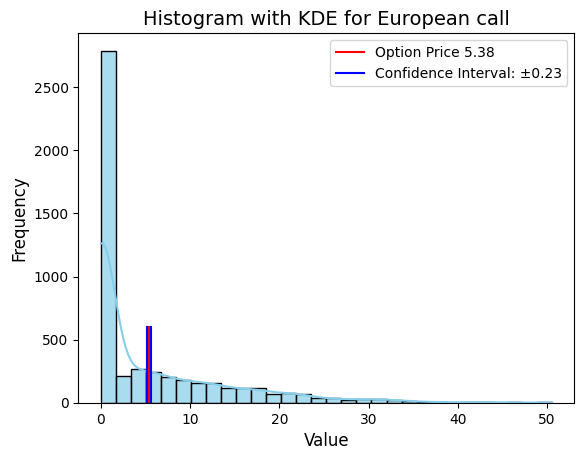

MC estimated option price: 4.6055504130508
Conficence interval: (np.float64(4.410170217649169), np.float64(4.800930608452431))


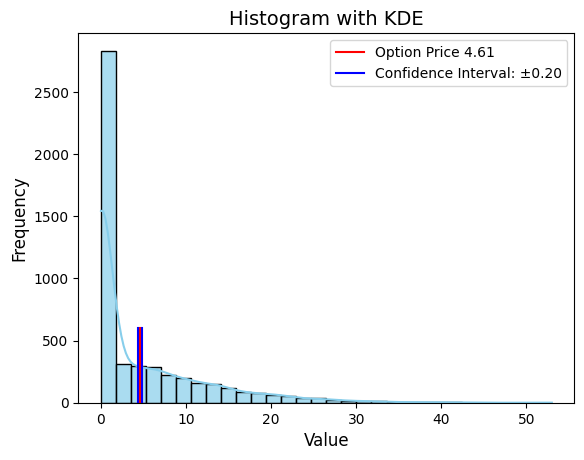

MC estimated option price: 7.759866955752501
Conficence interval: (np.float64(7.4200286006463605), np.float64(8.09970531085864))


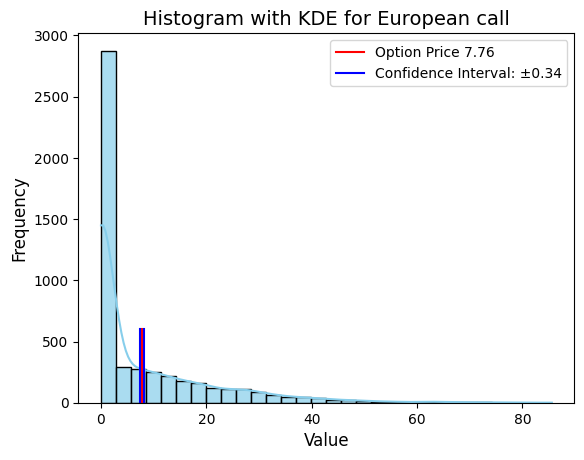

MC estimated option price: 7.245815533922746
Conficence interval: (np.float64(6.9322411840280065), np.float64(7.559389883817486))


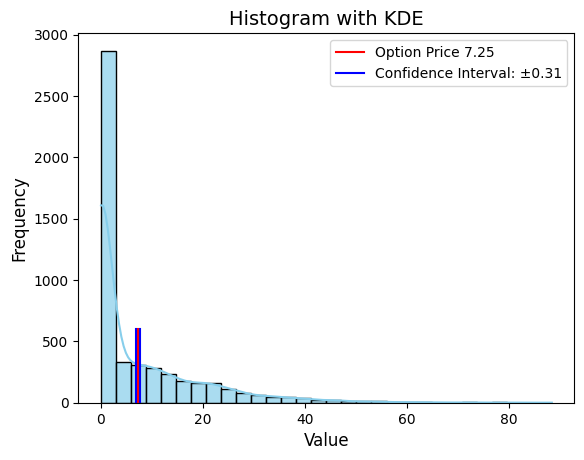

MC estimated option price: 12.420540226437852
Conficence interval: (np.float64(11.84553379110019), np.float64(12.995546661775515))


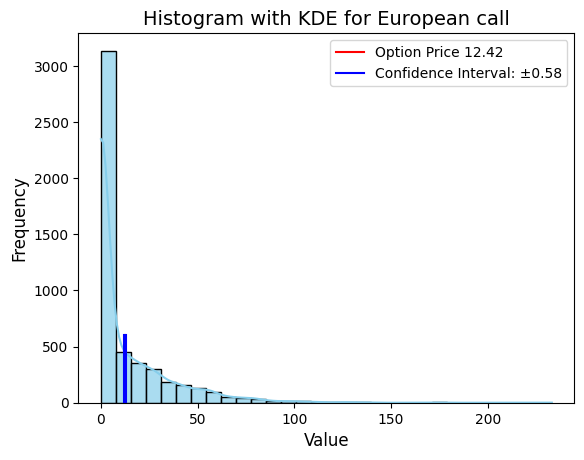

MC estimated option price: 10.471437205380695
Conficence interval: (np.float64(9.9952670249137), np.float64(10.947607385847691))


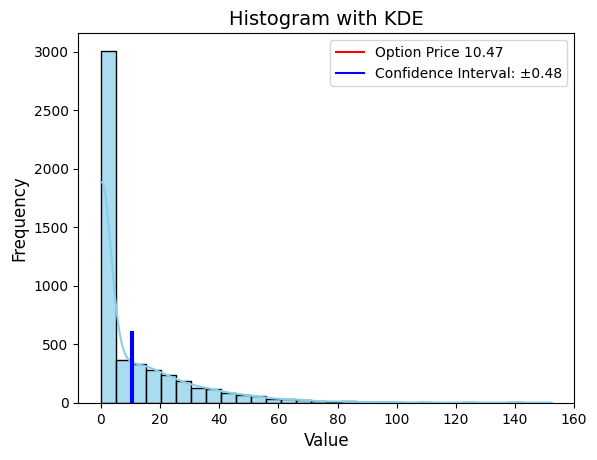

MC estimated option price: 18.311856936365395
Conficence interval: (np.float64(17.40584362130774), np.float64(19.21787025142305))


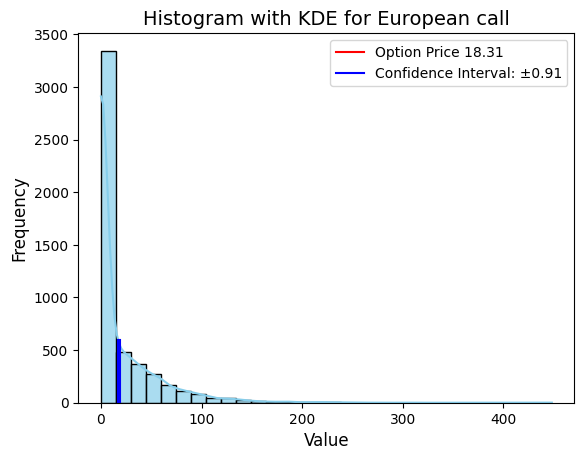

MC estimated option price: 14.32995693707821
Conficence interval: (np.float64(13.64236901627397), np.float64(15.01754485788245))


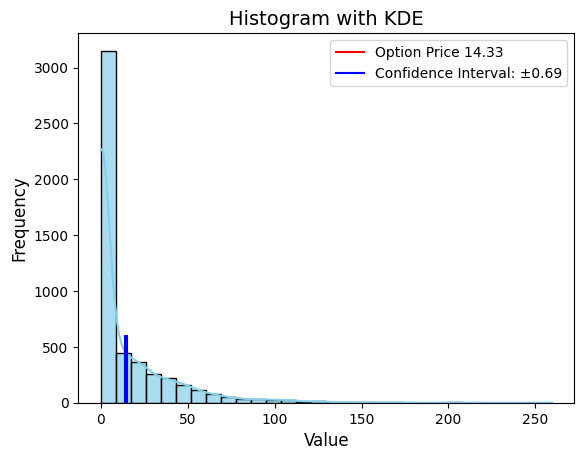

MC estimated option price: 25.92701373308319
Conficence interval: (np.float64(24.530552233152353), np.float64(27.323475233014026))


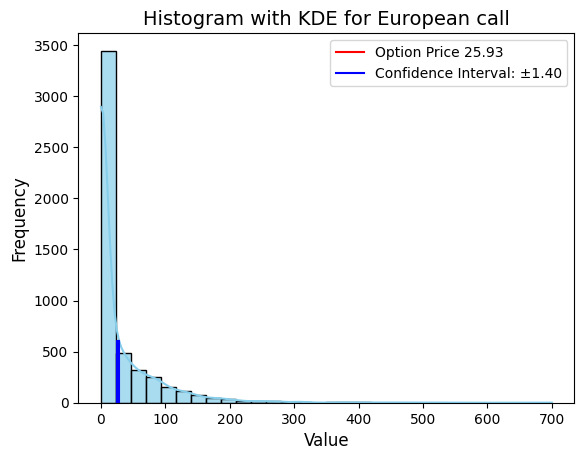

MC estimated option price: 22.598396910769004
Conficence interval: (np.float64(21.362193081868583), np.float64(23.834600739669426))


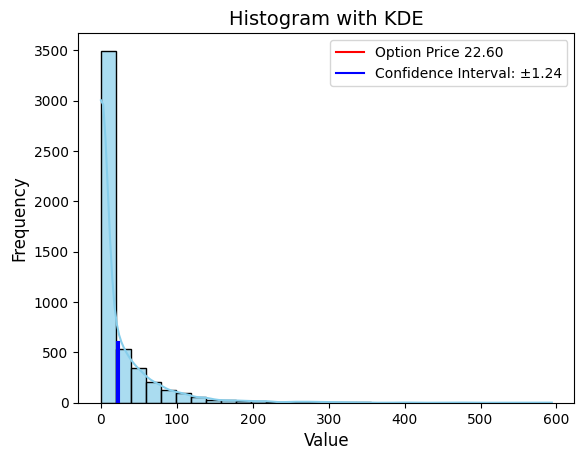

MC estimated option price: 41.853425475930734
Conficence interval: (np.float64(39.15752480965715), np.float64(44.54932614220432))


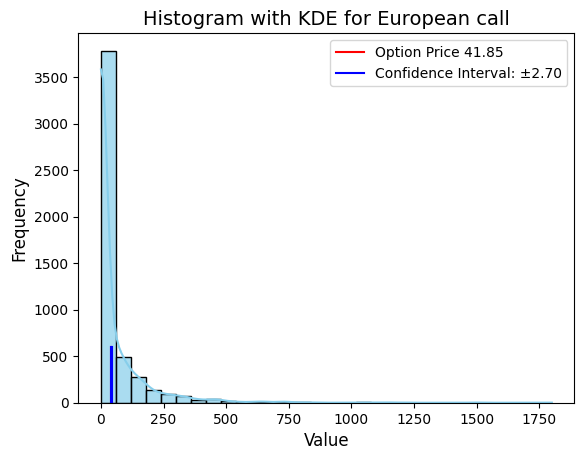

MC estimated option price: 30.44268798733796
Conficence interval: (np.float64(28.41033535784676), np.float64(32.475040616829155))


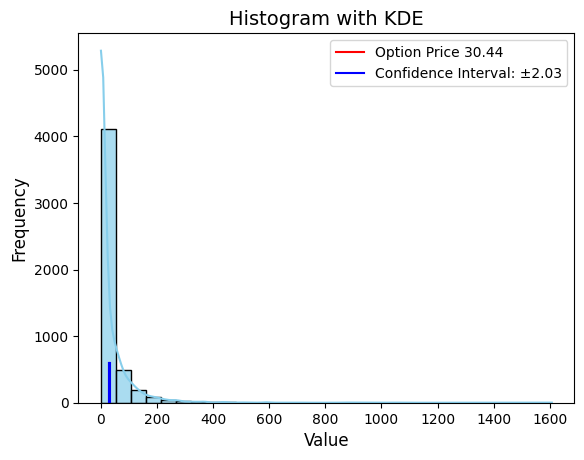

MC estimated option price: 58.73577419800216
Conficence interval: (np.float64(53.32314955911406), np.float64(64.14839883689027))


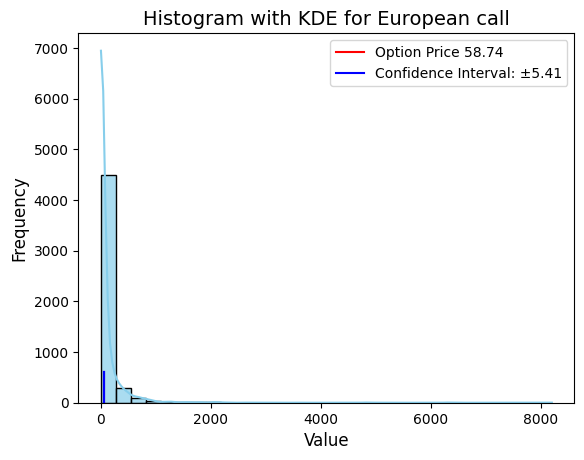

In [ ]:
for i in range(len(T)):
  p,c = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n[i],T[i])
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_european_opt(S0,K,R,Sig,N,n[i],T[i])
  EP.append(p)
  EC1.append(c[0])
  EC2.append(c[1])

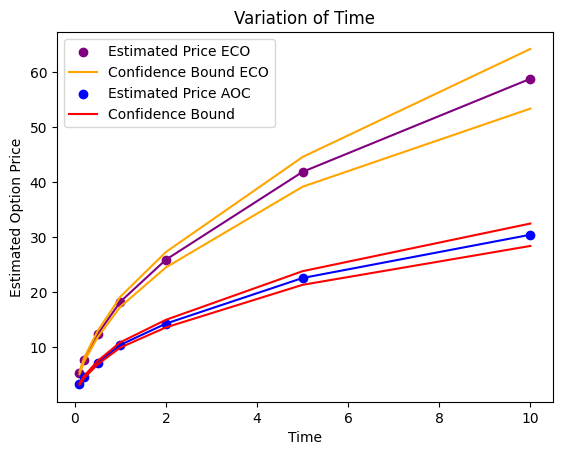

In [ ]:
plt.scatter(T,EP, color = 'purple', label = 'Estimated Price ECO')
plt.plot(T,EP, color = 'purple')
plt.plot(T,EC2, color = 'orange', label = 'Confidence Bound ECO')
plt.plot(T,EC1, color = 'orange')

plt.scatter(T,P, color = 'blue', label = 'Estimated Price AOC')
plt.plot(T,P, color = 'blue')
plt.plot(T,C2, color = 'red', label = 'Confidence Bound')
plt.plot(T,C1, color = 'red')
plt.xlabel('Time')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Time')
plt.legend()
plt.show()


### Comparison to European Call

In [ ]:
def mc_european_opt(S_0,k,r,sig,N,n,t,plot=True,rs=42,conf=0.95):
  S = GBM_N(N,n,t, S_0, r, sig,rs)
  prices = np.maximum(S[:,-1]-k,0)
  mean_price = np.exp(-r*t)*prices.mean()
  std_price = np.exp(-r*t)*prices.std()
  conf_int = stats.t.interval(confidence=0.95,df=N-1,loc=mean_price,
                                  scale=std_price / np.sqrt(N))
  if plot == True:
    p = int(N/100*12)
    print("MC estimated option price: {}\nConficence interval: {}".format(mean_price,conf_int))
    sns.histplot(prices, kde=True, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.plot([mean_price,mean_price],[0,p],color='red',label='Option Price {:.2f}'.format(mean_price))
    plt.plot([conf_int[0],conf_int[0]],[0,p],color='blue',label='Confidence Interval: ±{:.2f}'.format(mean_price-conf_int[0]))
    plt.plot([conf_int[1],conf_int[1]],[0,p],color='blue')
    plt.title("Histogram with KDE for European call", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.show()
  return mean_price, conf_int

## Question 3

### Approximating $S_t$

In [ ]:
def approx_GBM_N(N,n,t, S_0, mu, sig,rs=42):
  np.random.seed(rs)
  dt = t/n
  S = np.zeros((N,n+1))
  S[:,0] = S_0*np.ones(N)
  Z = np.random.randn(N,n)
  for i in range(1,n+1):
    S[:,i] = S[:,i-1]+mu*dt*S[:,i-1]+sig*np.sqrt(dt)*S[:,i-1]*Z[:,i-1]
  return S[:,1:]

L2 error: 2.740


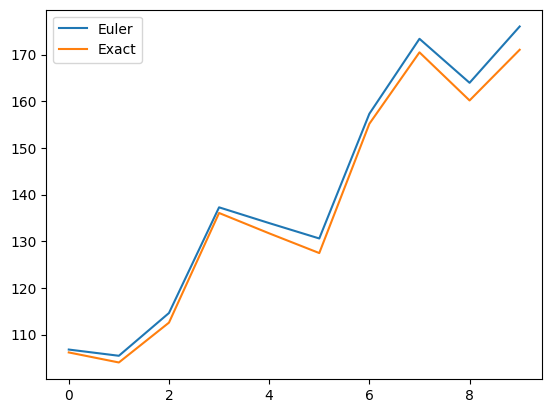

In [ ]:
S1 = approx_GBM_N(1,10,1, 100, 0.05, 0.4)
S2 = GBM_N(1,10,1, 100, 0.05, 0.4)
error = np.sqrt(np.mean((S1 - S2)**2))
print('L2 error: {:.3f}'.format(error))
plt.plot(S1[0,:],label='Euler')
plt.plot(S2[0,:],label='Exact')
plt.legend()
plt.show()

### Changing $m$

In [ ]:
S0 = 100
K = 100
Sig = 0.4
T = 1
n = [1,2,5,10,25,50,100,250,500,750,1000,1500,2000,2500,5000]
n_ref = 10000
N = 10000
R = 0.05
P = []
C1 = []
C2 = []

MC estimated option price: 9.868051594724118
Conficence interval: (np.float64(9.555162048337035), np.float64(10.180941141111202))


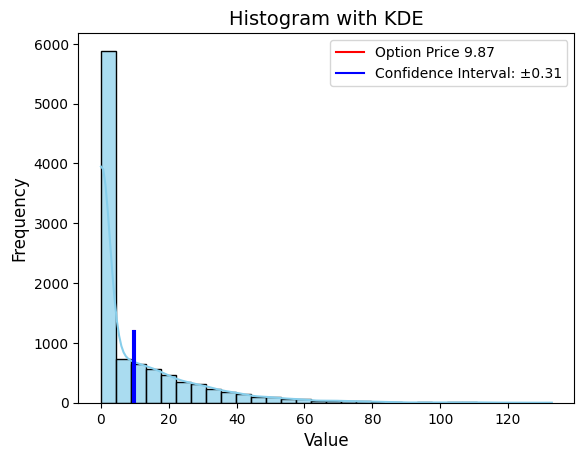

In [ ]:
# reference solution with n=10000
p_ref, c_ref = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n_ref,T)

Note that the comparison to a reference solution might not be too rigorous as this fine reference solution also includes monte carlo noise

In [ ]:
P_g = np.zeros((5,len(n)))
C1_g = np.zeros((5,len(n)))
C2_g = np.zeros((5,len(n)))
for rs in range(5):
  for i in range(len(n)):
    p,c = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n[i],T,rs=rs,plot=False)
    P_g[rs,i] = p
    C1_g[rs,i] = c[0]
    C2_g[rs,i] = c[1]

P = P_g.mean(axis=0)
C1 = C1_g.mean(axis=0)
C2 = C2_g.mean(axis=0)

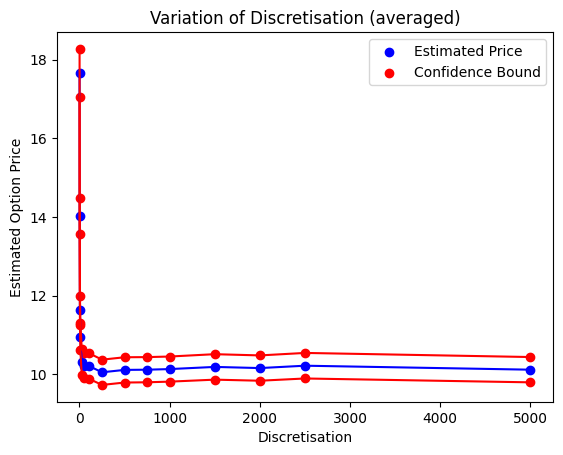

In [ ]:
plt.scatter(n,P, color = 'blue', label = 'Estimated Price')
plt.plot(n,P, color = 'blue')
plt.scatter(n,C1, color = 'red', label = 'Confidence Bound')
plt.plot(n,C2, color = 'red')
plt.plot(n,C1, color = 'red')
plt.scatter(n,C2, color = 'red')
plt.xlabel('Discretisation')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Discretisation (averaged)')
plt.legend()
plt.show()

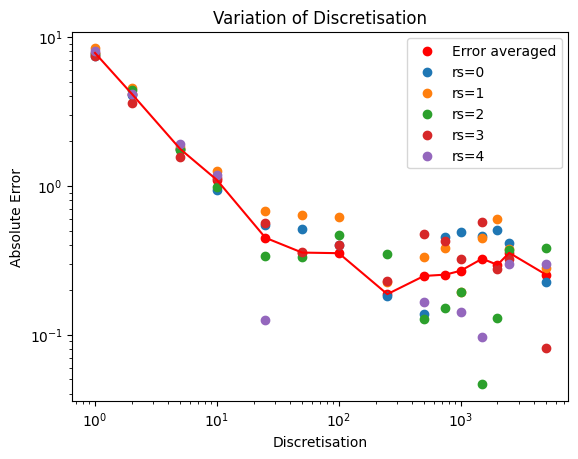

In [ ]:
P_abs = np.array(P)-float(p_ref)
plt.scatter(n,P_abs, color = 'red', label = 'Error averaged')
plt.plot(n,P_abs, color = 'red')
for i in range(5):
  P_abs = np.array(P_g[i,:])-float(p_ref)
  plt.scatter(n,P_abs,label='rs={}'.format(i))

plt.xlabel('Discretisation')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.xscale('log')
plt.title('Variation of Discretisation')
plt.legend()
plt.show()


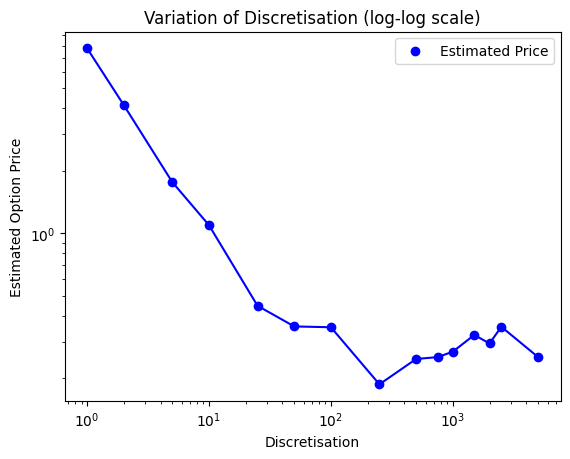

In [ ]:
P_abs = np.array(P)-float(p_ref)
plt.scatter(n,P_abs, color = 'blue', label = 'Estimated Price')
plt.plot(n,P_abs, color = 'blue')
plt.xlabel('Discretisation')
plt.ylabel('Estimated Option Price')
plt.yscale('log')
plt.xscale('log')
plt.title('Variation of Discretisation (log-log scale)')
plt.legend()
plt.show()

### Trapezoid Rule

MC estimated option price: 9.867281406311145
Conficence interval: (np.float64(9.554417438083735), np.float64(10.180145374538554))


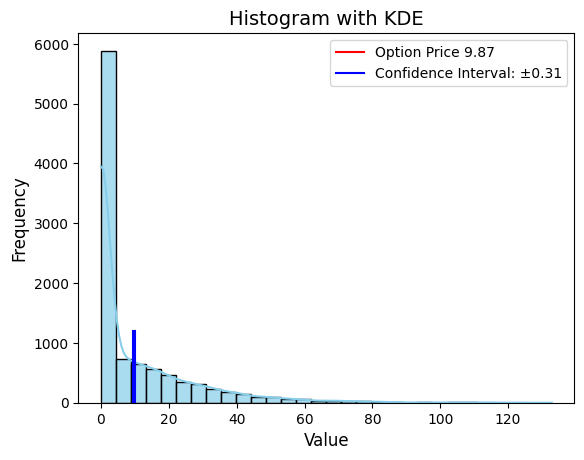

In [ ]:
# Reference solution with n = 10000 evaluations and trapezoidal rule
p_ref, c_ref = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n_ref,T,trapezoid=True)

In [ ]:
P = []
C1 = []
C2 = []
P_a = []
C1_a = []
C2_a = []
for i in range(len(n)):
  p,c = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n[i],T,plot=False)
  P.append(p)
  C1.append(c[0])
  C2.append(c[1])
  p,c = mc_arithmetic_assian_opt(S0,K,R,Sig,N,n[i],T,plot=False,trapezoid=True)
  P_a.append(p)
  C1_a.append(c[0])
  C2_a.append(c[1])

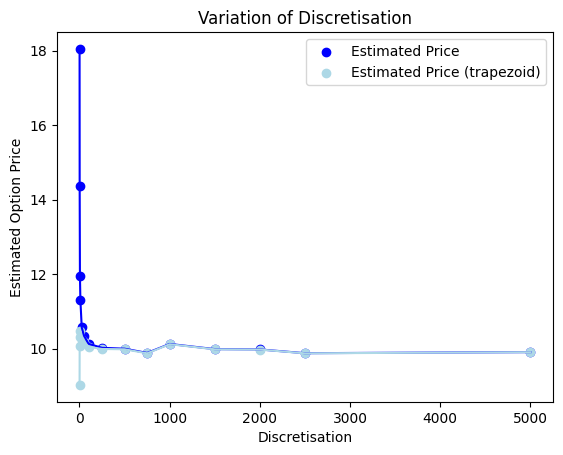

In [ ]:
plt.scatter(n,P, color = 'blue', label = 'Estimated Price')
plt.plot(n,P, color = 'blue')

plt.scatter(n,np.array(P_a), color = 'lightblue', label = 'Estimated Price (trapezoid)')
plt.plot(n,np.array(P_a), color = 'lightblue')

plt.xlabel('Discretisation')
plt.ylabel('Estimated Option Price')
plt.title('Variation of Discretisation')
plt.legend()
plt.show()

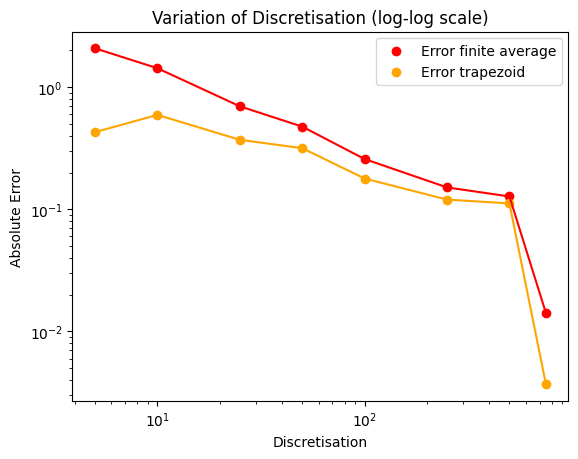

In [ ]:
P_abs = np.abs(np.array(P)-float(p_ref))
P_abs2 = np.abs(np.array(P_a)-float(p_ref))
plt.scatter(n[2:-5],P_abs[2:-5], color = 'red', label = 'Error finite average')
plt.plot(n[2:-5],P_abs[2:-5], color = 'red')
plt.scatter(n[2:-5],P_abs2[2:-5], color = 'orange', label = 'Error trapezoid')
plt.plot(n[2:-5],P_abs2[2:-5], color = 'orange')
plt.xlabel('Discretisation')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.xscale('log')
plt.title('Variation of Discretisation (log-log scale)')
plt.legend()
plt.show()

---

## Question 4

Estimate the following Greeks: the delta $\frac{∂Y}
{∂S_0}$ , the vega $\frac{∂Y}
{∂σ}$, and the rho $\frac{∂Y}
{∂r}$ for the Asian option. Use both finite
difference methods and pathwise estimators. Compare the approaches for the parameter values provided in Question
1.

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Constants
S0     = 100
K      = 100
r      = 0.05
sigma  = 0.4
T      = 1

# Helper functions
def simulate_gbm_exact(S0, mu, sigma, T, Ndt, Nsims, Z=None):
    dt = T / Ndt
    time = np.linspace(0, T, Ndt+1)
    S = np.zeros((Ndt+1, Nsims))

    if Z is None:
        Z = np.random.randn(Ndt+1, Nsims)

    S[0] = S0
    for k in range(Ndt):
        S[k+1] = S[k] * np.exp((mu - 0.5*sigma*sigma) * dt +
                               sigma * np.sqrt(dt) * Z[k])

    return time, S, Z


def simulate_price(S0, r, sigma, T, Ndt, Nsims, Z):
    _, S, _ = simulate_gbm_exact(S0, r, sigma, T, Ndt, Nsims, Z=Z)
    Sbar = S[1:].mean(axis=0)
    return np.exp(-r*T) * np.maximum(Sbar - K, 0)

def compute_stats(samples):
    mean = samples.mean()
    var = samples.var(ddof=1)
    se = np.sqrt(var / len(samples))
    ci_lower = mean - 1.96*se
    ci_upper = mean + 1.96*se
    return {"mean": mean, "var": var, "se": se, "ci_lower": ci_lower, "ci_upper": ci_upper}


def generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h,
                      param, use_ctr, use_crn):
    """
    Function to calculate finite difference for delta, vega or rho (dependent on value of <param>).

    use_ctr is a bool. When true, central difference is used. (otherwise, forward difference)
    use_crn is a bool. When true, CRN is used. (otherwise, independant)
    """

    Z1 = np.random.randn(Ndt, Nsims)
    Z2 = Z1 if use_crn else np.random.randn(Ndt, Nsims)

    base_offset = -h if use_ctr else 0 # if forward, base is original value, thus offset is 0
    fwd_offset = h

    if param == "S0":
        f_base = simulate_price(S0 + base_offset, r, sigma, T, Ndt, Nsims, Z1)
        f_fwd  = simulate_price(S0 + fwd_offset, r, sigma, T, Ndt, Nsims, Z2)

    elif param == "sigma":
        f_base = simulate_price(S0, r, sigma + base_offset, T, Ndt, Nsims, Z1)
        f_fwd  = simulate_price(S0, r, sigma + fwd_offset, T, Ndt, Nsims, Z2)

    elif param == "r":
        f_base = simulate_price(S0, r + base_offset, sigma, T, Ndt, Nsims, Z1)
        f_fwd  = simulate_price(S0, r + fwd_offset, sigma, T, Ndt, Nsims, Z2)

    diff = (f_fwd - f_base) / (2*h if use_ctr else h)
    return diff


def delta_pathwise(S, r, sigma, T, t, Z):
    """
    Estimating delta using pathwise method.

    See appendix in report for derivation.
    """
    Sbar = S[1:].mean(axis=0)
    discount = np.exp(-r*T)
    pos = (Sbar > K)
    dSbar_dS0 = Sbar / S0
    return discount * pos * dSbar_dS0


def vega_pathwise(S, r, sigma, T, t, Z, Ndt):
    """
    Estimating vega using pathwise method.

    See appendix in report for derivation.
    """
    Sbar = S[1:].mean(axis=0)
    dt = T / Ndt
    Wt = np.cumsum(Z * np.sqrt(dt), axis=0)
    pos = (Sbar > K)
    expo = np.exp((r - 0.5*sigma*sigma) * t[1:,None] + sigma*Wt[1:])
    dSbar_dsigma = S0 * (expo * (Wt[1:] - sigma*t[1:,None])).mean(axis=0)
    return np.exp(-r*T) * pos * dSbar_dsigma


def rho_pathwise(S, r, sigma, T, t, Z, Ndt):
    """
    Estimating rho using pathwise method.

    See appendix in report for derivation.
    """
    Sbar = S[1:].mean(axis=0)
    payoff = np.maximum(Sbar - K, 0)
    discount = np.exp(-r*T)
    dt = T/Ndt
    Wt = np.cumsum(Z * np.sqrt(dt), axis=0)
    pos = (Sbar > K)
    expo = np.exp((r - 0.5*sigma*sigma)*t[1:,None] + sigma*Wt[1:])
    dSbar_dr = (S0 / Ndt) * np.sum(expo * t[1:,None], axis=0)
    return discount * (-T * payoff + pos * dSbar_dr)


def plot_kde(plot_configs, title):
    plt.figure(figsize=(10,6))

    for label, data in plot_configs.items():
        xs = np.linspace(min(data), max(data), 300)
        plt.plot(xs, gaussian_kde(data)(xs),
                label=label, linewidth=2)

    plt.title(title)
    plt.xlabel("Greek estimate")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


Monte Carlo Results:

delta


mean         var     se  ci_lower  ci_upper
FD, Forward, Independent  16.44  5420251.26  52.06    -85.60    118.47
FD, Forward, CRN           0.57        0.36   0.01      0.54      0.59
FD, Central, Independent -36.42  1474694.10  27.15    -89.64     16.80
FD, Central, CRN           0.57        0.35   0.01      0.54      0.59
PW                         0.56        0.34   0.01      0.54      0.59


vega


mean         var     se  ci_lower  ci_upper
FD, Forward, Independent  23.86  5774326.15  53.73    -81.46    129.17
FD, Forward, CRN          21.67     2336.74   1.08     19.55     23.78
FD, Central, Independent  34.35  1305729.89  25.55    -15.73     84.43
FD, Central, CRN          22.92     2314.64   1.08     20.81     25.03
PW                        20.52     1854.89   0.96     18.63     22.40


rho


mean         var     se  ci_lower  ci_upper
FD, Forward, Independent  55.01  5559474.93  52.72    -48.33    158.35
FD, Forward, CRN          20.20      418.78   0.46     19.30     21.09
FD, Central, Independent  36.08  1326063.50  25.75    -14.39     86.55
FD, Central, CRN          19.12      408.78   0.45     18.24     20.01
PW                        19.71      427.08   0.46     18.80     20.62


FD vs PW:

delta


FD Estimate  PW Estimate  Difference
FD, Forward, Independent        16.44         0.56       15.87
FD, Forward, CRN                 0.57         0.56        0.00
FD, Central, Independent       -36.42         0.56      -36.99
FD, Central, CRN                 0.57         0.56        0.00


vega


FD Estimate  PW Estimate  Difference
FD, Forward, Independent        23.86        20.52        3.34
FD, Forward, CRN                21.67        20.52        1.15
FD, Central, Independent        34.35        20.52       13.83
FD, Central, CRN                22.92        20.52        2.40


rho


FD Estimate  PW Estimate  Difference
FD, Forward, Independent        55.01        19.71       35.30
FD, Forward, CRN                20.20        19.71        0.49
FD, Central, Independent        36.08        19.71       16.37
FD, Central, CRN                19.12        19.71       -0.59


KDE plots:



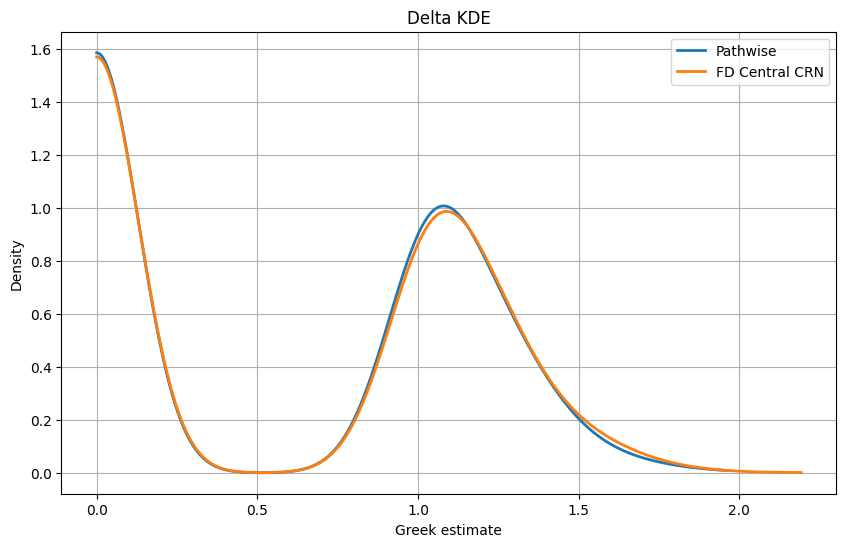

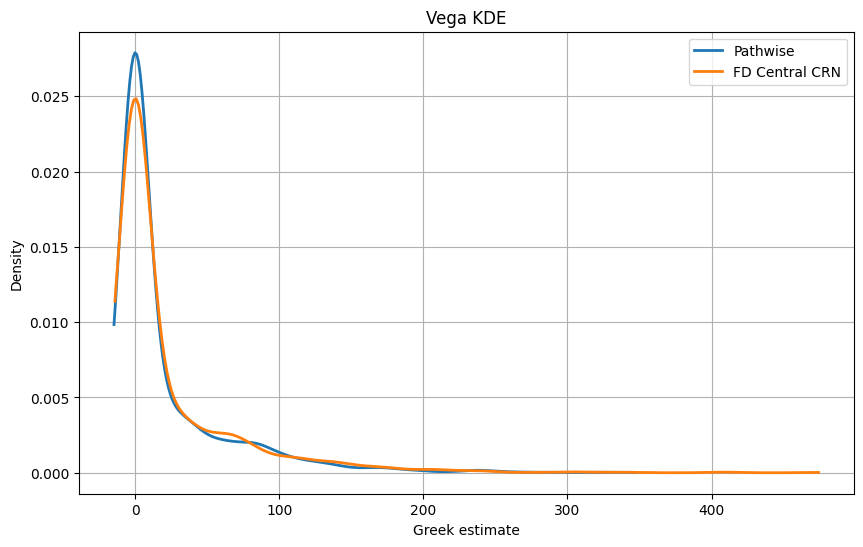

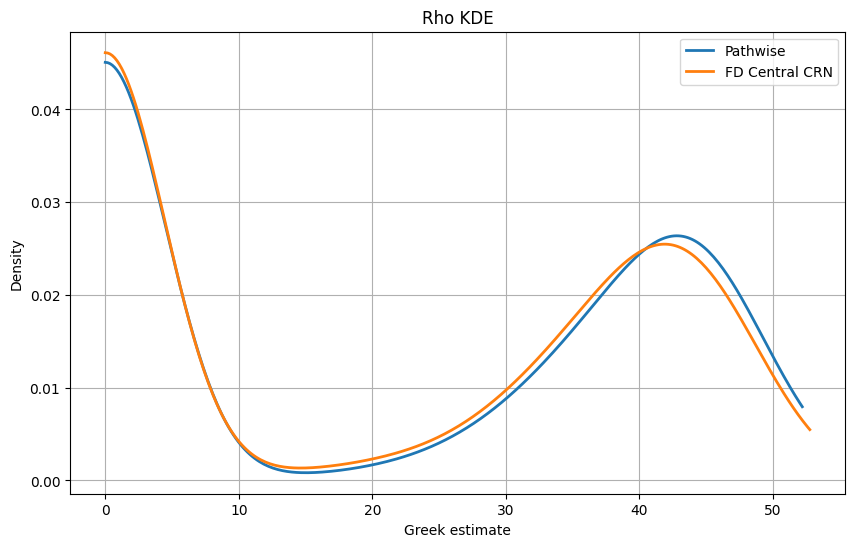

In [ ]:
# Params
Ndt    = 1000
Nsims  = 2000
h      = 0.01 # for finite difference method

np.random.seed(1234) # set seed for consistent results

delta_fd_fwd_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="S0", use_ctr=False, use_crn=False)
delta_fd_ctr_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="S0", use_ctr=True, use_crn=False)
delta_fd_fwd_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="S0", use_ctr=False, use_crn=True)
delta_fd_ctr_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="S0", use_ctr=True, use_crn=True)

vega_fd_fwd_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="sigma", use_ctr=False, use_crn=False)
vega_fd_ctr_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="sigma", use_ctr=True, use_crn=False)
vega_fd_fwd_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="sigma", use_ctr=False, use_crn=True)
vega_fd_ctr_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="sigma", use_ctr=True, use_crn=True)

rho_fd_fwd_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="r", use_ctr=False, use_crn=False)
rho_fd_ctr_ind = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="r", use_ctr=True, use_crn=False)
rho_fd_fwd_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="r", use_ctr=False, use_crn=True)
rho_fd_ctr_crn = generate_fd_greek(S0, r, sigma, T, Ndt, Nsims, h, param="r", use_ctr=True, use_crn=True)

# save price, as well as Z and t, for pathwise estimation
t, S, Z = simulate_gbm_exact(S0, r, sigma, T, Ndt, Nsims)

delta_pw = delta_pathwise(S, r, sigma, T, t, Z)
vega_pw = vega_pathwise(S, r, sigma, T, t, Z, Ndt)
rho_pw = rho_pathwise(S, r, sigma, T, t, Z, Ndt)

# compile all the results into dataframes

delta_results = pd.DataFrame({
    "FD, Forward, Independent": compute_stats(delta_fd_fwd_ind),
    "FD, Forward, CRN": compute_stats(delta_fd_fwd_crn),
    "FD, Central, Independent": compute_stats(delta_fd_ctr_ind),
    "FD, Central, CRN": compute_stats(delta_fd_ctr_crn),
    "PW": compute_stats(delta_pw)
}).T.astype(float)

vega_results = pd.DataFrame({
    "FD, Forward, Independent": compute_stats(vega_fd_fwd_ind),
    "FD, Forward, CRN": compute_stats(vega_fd_fwd_crn),
    "FD, Central, Independent": compute_stats(vega_fd_ctr_ind),
    "FD, Central, CRN": compute_stats(vega_fd_ctr_crn),
    "PW": compute_stats(vega_pw)
}).T.astype(float)

rho_results = pd.DataFrame({
    "FD, Forward, Independent": compute_stats(rho_fd_fwd_ind),
    "FD, Forward, CRN": compute_stats(rho_fd_fwd_crn),
    "FD, Central, Independent": compute_stats(rho_fd_ctr_ind),
    "FD, Central, CRN": compute_stats(rho_fd_ctr_crn),
    "PW": compute_stats(rho_pw)
}).T.astype(float)

# Show all results
print("Monte Carlo Results:\n")
print("delta")
display(delta_results.round(2))
print()
print("vega")
display(vega_results.round(2))
print()
print("rho")
display(rho_results.round(2))
print()

# Compare FD estimates with PW

delta_diff_df = delta_results[delta_results.index != "PW"][["mean"]].rename(columns={"mean": "FD Estimate"})
delta_diff_df["PW Estimate"] = delta_results.loc["PW", "mean"]
delta_diff_df["Difference"] = delta_diff_df["FD Estimate"] - delta_diff_df["PW Estimate"]

vega_diff_df = vega_results[vega_results.index != "PW"][["mean"]].rename(columns={"mean": "FD Estimate"})
vega_diff_df["PW Estimate"] = vega_results.loc["PW", "mean"]
vega_diff_df["Difference"] = vega_diff_df["FD Estimate"] - vega_diff_df["PW Estimate"]

rho_diff_df = rho_results[rho_results.index != "PW"][["mean"]].rename(columns={"mean": "FD Estimate"})
rho_diff_df["PW Estimate"] = rho_results.loc["PW", "mean"]
rho_diff_df["Difference"] = rho_diff_df["FD Estimate"] - rho_diff_df["PW Estimate"]

print("FD vs PW:\n")
print("delta")
display(delta_diff_df.round(2))
print()
print("vega")
display(vega_diff_df.round(2))
print()
print("rho")
display(rho_diff_df.round(2))
print()


# plot KDE to compare distributions

print("KDE plots:\n")

plot_kde({"Pathwise": delta_pw, "FD Central CRN": delta_fd_ctr_crn}, title="Delta KDE")
plot_kde({"Pathwise": vega_pw, "FD Central CRN": vega_fd_ctr_crn}, title="Vega KDE")
plot_kde({"Pathwise": rho_pw, "FD Central CRN": rho_fd_ctr_crn}, title="Rho KDE")

---

## Question 5
This code is used to calculate the price of a geometric-average Asian call option using both a closed-form analytic formula and a Monte Carlo simulation approach. The parameters was provided in Question 1.

Since $\bar{S} = \left( \prod_{i=1}^{m} S_{t_i} \right)^{1/m}$, and under the risk neutral measure, the value $\log S(t_i)$ of a geometric brownian motion at times $t_1, \ldots, t_m$ are following normal distribution. Thus, we have $\log \bar{S} = \frac{1}{m} \sum_{i=1}^{m} \log S(t_i)$ meaning that $\log \bar{S}$ is lognormal



In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
def geometric_asian_price_closed_form(S0, K, r, sigma, T, m):
    """
    Closed-form price of a geometric-average Asian call with m fixing dates.
    Fixing times are equally spaced: t_i = i * T / m.
    """
    t = np.linspace(T/m, T, m)

    # mean of log S(t_i) under risk-neutral measure
    mu_i = np.log(S0) + (r - 0.5 * sigma**2) * t

    # covariance matrix of log S(t_i): Cov = sigma^2 * min(t_i, t_j)
    tt = np.minimum.outer(t, t)
    cov_logS = sigma**2 * tt

    # log G = (1/m) sum log S(t_i)
    mu_G = mu_i.mean()
    v_G  = cov_logS.sum() / (m**2)

    sqrt_v = np.sqrt(v_G)

    d1 = (mu_G - np.log(K) + v_G) / sqrt_v
    d2 = d1 - sqrt_v

    undiscounted = np.exp(mu_G + 0.5 * v_G) * norm.cdf(d1) - K * norm.cdf(d2)
    price = np.exp(-r * T) * undiscounted

    return price


This part is for implementing a Monte Carlo estimator of the geometric Asian call option by reusing the exact GBM simulator developed earlier. We compute the geometric average along each simulated path, discount the payoff, and compare the Monte Carlo estimate with the analytic closed-form price.

In [ ]:
def geometric_asian_mc_price(S0, K, r, sigma, T, m, Ndt, Nsims):
    """
    Monte Carlo estimator for geometric-average Asian call.

    We simulate GBM with Ndt time steps, then pick m evenly spaced
    observation times among those steps to form the geometric average.
    """
    # by Q4
    time, S, Z = simulate_gbm_exact(S0, r, sigma, T, Ndt, Nsims)

    # choose m indices between 1 and Ndt (we skip index 0 which is S0)
    idx = np.linspace(1, Ndt, m, dtype=int)
    S_fix = S[idx, :]

    # geometric average along each path
    G = np.exp(np.mean(np.log(S_fix), axis=0))

    payoff = np.exp(-r * T) * np.maximum(G - K, 0.0)
    price  = payoff.mean()
    se     = payoff.std(ddof=1) / np.sqrt(Nsims)

    return price, se


This part is for examining how the geometric Asian option price behaves as the number of monitoring points m increases. By comparing analytic and Monte Carlo prices for $m=100,200,500,1000,2000$ we are going to observe that both methods converge and the option value stabilizes once m is sufficiently large.

     m     Analytic     MC Price     StdErr   95% CI Lower   95% CI Upper     |Diff|
--------------------------------------------------------------------------------
   100       9.4443       9.2455     0.3380         8.5831         9.9078     0.1988
   200       9.4046       9.8697     0.3565         9.1709        10.5685     0.4651
   500       9.3809       9.2632     0.3335         8.6095         9.9168     0.1177
  1000       9.3729       9.7132     0.3510         9.0251        10.4013     0.3403
  2000       9.3690       9.4558     0.3366         8.7962        10.1154     0.0868


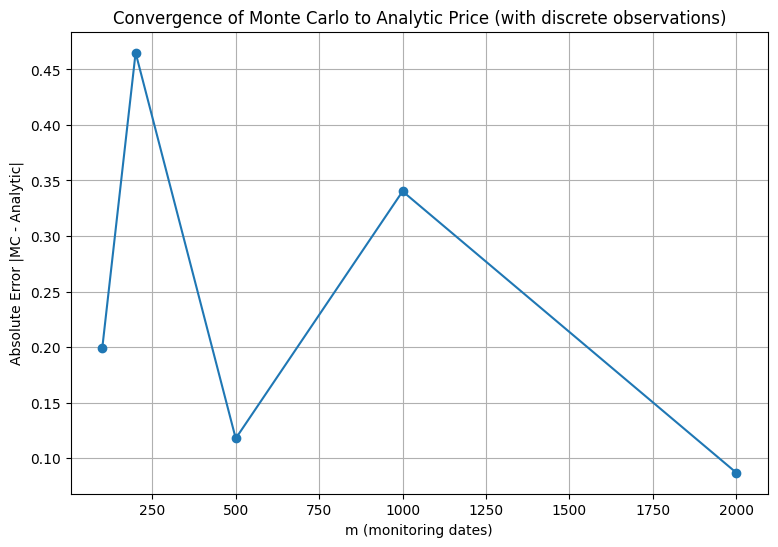

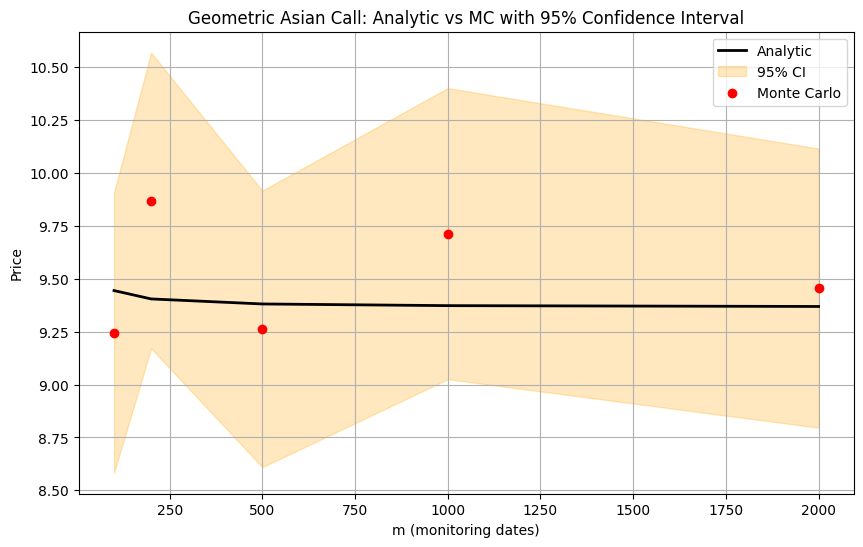

In [ ]:
S0 = 100
K = 100
r = 0.05
sigma = 0.4
T = 1
Ndt = 252
Nsim = 2000

ms = [100,200,500,1000,2000]

analytic_list = []
mc_list = []
stderr_list = []
diff_list = []
ci_low_list = []
ci_high_list = []

print(f"{'m':>6} {'Analytic':>12} {'MC Price':>12} {'StdErr':>10} {'95% CI Lower':>14} {'95% CI Upper':>14} {'|Diff|':>10}")
print("-"*80)

for m in ms:
    analytic = geometric_asian_price_closed_form(S0, K, r, sigma, T, m)
    mc_price, mc_se = geometric_asian_mc_price(S0, K, r, sigma, T, m, Ndt, Nsim)

    # 95% confidence interval
    ci_low = mc_price - 1.96 * mc_se
    ci_high = mc_price + 1.96 * mc_se

    analytic_list.append(analytic)
    mc_list.append(mc_price)
    stderr_list.append(mc_se)
    diff_list.append(abs(mc_price - analytic))
    ci_low_list.append(ci_low)
    ci_high_list.append(ci_high)

    print(f"{m:6d} {analytic:12.4f} {mc_price:12.4f} {mc_se:10.4f} "
          f"{ci_low:14.4f} {ci_high:14.4f} {abs(mc_price-analytic):10.4f}")

plt.figure(figsize=(9,6))
plt.plot(ms, diff_list, marker='o')
plt.xlabel("m (monitoring dates)")
plt.ylabel("Absolute Error |MC - Analytic|")
plt.title("Convergence of Monte Carlo to Analytic Price (with discrete observations)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ms, analytic_list, label="Analytic", color="black", linewidth=2)

# CI band shading
plt.fill_between(ms, ci_low_list, ci_high_list, color="orange", alpha=0.25, label="95% CI")
plt.scatter(ms, mc_list, color="red", label="Monte Carlo", zorder=5)
plt.xlabel("m (monitoring dates)")
plt.ylabel("Price")
plt.title("Geometric Asian Call: Analytic vs MC with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()


---

## Question 6
This is the code used to calculate the analytic price using Hull and Monte Carlo simulated price of the up-and-in put option.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import exp, log, sqrt


We will reuse the existing GBM simulation from GBM-sample-paths.ipynb provided by the instructor.

In [ ]:
def simulate_gbm_exact(S0, mu, sigma, T, Ndt, Nsims=10):
    """
    Simulate two-dimensional Geometric Brownian Motion with correlation rho.

    Parameters:
    S0: Initial value of the process.
    mu: Drift coefficient of the process.
    sigma: Volatility coefficient of the process.
    T: Total time period to simulate.
    Ndt: Number of time steps to take.

    Returns:
    prices: Simulated process over time.
    """
    dt = T / Ndt
    time = np.linspace(0, T, Ndt+1)
    S = np.zeros((Ndt+1,Nsims))
    S[0,:] = S0
    for idx in range(Ndt):
        Z = np.random.randn(Nsims)
        S[idx+1,:] = S[idx,:] * np.exp( (mu - (sigma**2)/2) * dt
                                      + sigma * np.sqrt(dt) * Z)
    return time, S

We first consider the analytic solution from Hull:

In [ ]:
def up_in_put_analytic_hull(S0, K, H, r, q, sigma, T):
    """
    Analytic price of an up-and-in put (H >= K) from Hull.

    Parameters:
    S0: Initial underlying price.
    K: Strike.
    H: Barrier level (H >= S0, and formula assumes H >= K).
    r: Risk-free rate.
    q: Continuous dividend yield.
    sigma :Volatility.
    T: Time to maturity.

    Returns:
    p_ui: Analytic price of the up-and-in put.
    """
    if H < K:
        raise ValueError("This implementation assumes H >= K (barrier >= strike).")

    lam = (r - q + 0.5 * sigma**2) / (sigma**2)
    y = (np.log(H**2 / (S0 * K)) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    term1 = -S0 * np.exp(-q * T) * (H / S0)**(2 * lam) * norm.cdf(-y)
    term2 =  K * np.exp(-r * T) * (H / S0)**(2 * lam - 2.0) * norm.cdf(-y + sigma * np.sqrt(T))

    return term1 + term2


Next, we calculate the Monte Carlo up-and-in put (using 95% CI):

In [ ]:
def up_in_put_mc_using_simulator(S0, K, H, r, q, sigma, T,
                              M=252, N_paths=100000):
    """
    Monte Carlo price of an up-and-in European put with discounted payoffs, barrier indicator, and paths for plotting / diagnostics.
    S0: Initial price
    K: Strike
    H: barrier level
    r: Risk-free rate
    q: Divident yield (for discounted price)
    sigma: Volatility
    T: Time to maturity
    M: Number of time steps
    N_paths: Number of Monte Carlo sample paths.
    """
    mu_eff = r - q

    t_grid, S_paths = simulate_gbm_exact(S0, mu_eff, sigma, T, M, N_paths)

    if S_paths.shape[0] != N_paths:
        S_paths = S_paths.T

    max_S = np.max(S_paths, axis=1)
    barrier_hit = (max_S >= H)

    payoff_vanilla = np.maximum(K - S_paths[:, -1], 0.0)
    payoff = payoff_vanilla * barrier_hit.astype(float)

    disc_payoff = np.exp(-r * T) * payoff

    price = disc_payoff.mean()
    se = disc_payoff.std(ddof=1) / np.sqrt(N_paths)
    ci_half_width = 1.96 * se

    return price, ci_half_width, disc_payoff, barrier_hit, t_grid, S_paths

## Example Usage
First, we calculate both the analytic price and Monte Carlo estimation

In [ ]:
S0, K, H = 100, 100, 120
r, q, sigma, T = 0.05, 0.0, 0.2, 1.0
M = 252
N_paths = 100000
p_analytic = up_in_put_analytic_hull(S0, K, H, r, q, sigma, T)
p_mc, ci, disc_payoff, barrier_hit, t_grid, S_paths = up_in_put_mc_using_simulator(
S0, K, H, r, q, sigma, T, M=M, N_paths=N_paths
)

print(f"Analytic up-and-in put (Hull)        : {p_analytic:.6f}")
print(f"MC up-and-in put (simulate_gbm_exact): {p_mc:.6f} ± {ci:.6f} (95% CI)")


Analytic up-and-in put (Hull)        : 0.213398
MC up-and-in put (simulate_gbm_exact): 0.178487 ± 0.008746 (95% CI)


Next, we illustrate n_plot number of paths out of the total n_paths. Red paths are the one hitting the barrier (knocked-in), and the blue ones did not.

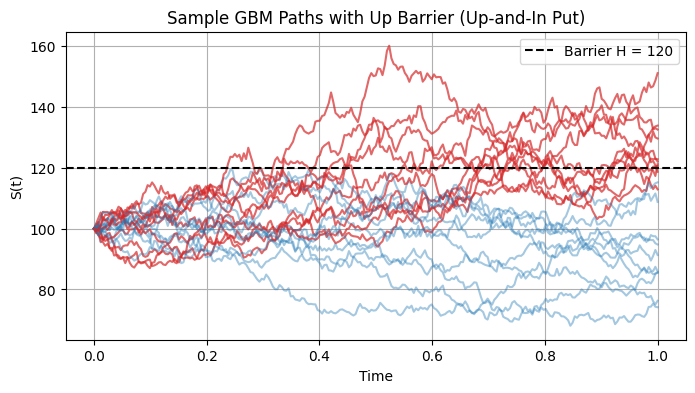

In [ ]:

plt.figure(figsize=(8, 4))
n_plot = 20
for i in range(n_plot):
    color = "tab:red" if barrier_hit[i] else "tab:blue"
    alpha = 0.7 if barrier_hit[i] else 0.4
    plt.plot(t_grid, S_paths[i, :], color=color, alpha=alpha)

plt.axhline(H, color="black", linestyle="--", label=f"Barrier H = {H}")

plt.xlabel("Time")
plt.ylabel("S(t)")
plt.title("Sample GBM Paths with Up Barrier (Up-and-In Put)")
plt.legend()
plt.grid(True)
plt.show()